DSM050 — Data Visualisation 
# Adoption in Brazil: A Data-Driven Analysis of Demographics and Preferences
**Author:** G. Gomes <br>
**Course:** UoL MSc Data Science  
**Date:** July 2024

## 1. Introduction

### 1.1 Topic Overview
Adoption in Brazil is a multifaceted process influenced by various social, racial, and demographic factors. As a prospective adoptive parent from Brazil, I am keen to explore and understand these dynamics better. The study aims to shed light on the demographic characteristics of children awaiting adoption and the preferences of prospective adoptive parents. By leveraging data visualization techniques, this research seeks to provide insights into the adoption process, highlighting potential areas for improvement and addressing common misconceptions about the system.

### 1.2 Background Research
Adoption in Brazil, once primarily seen as a pathway to maternity and paternity, has evolved into a crucial measure for ensuring the safety and well-being of minors. This shift is part of a broader trend called "Adoption-reconstruction," highlighting the need to continually adapt to the complex and changing realities of adoption, as explored by Guida-Richards in her book about pressing adoption themes (2021). According to Rodrigues et al. (2022), these changes have occurred rapidly, given that the legal adoption process in Brazil is relatively new. The National Adoption Council (CNA), established on April 29, 2008, was created to assist judges in matching potential adopters with children or adolescents seeking new families. However, the adoption ecosystem in Brazil is not without its flaws.

Nascimento (2020) notes that the adoption process in Brazil is riddled with socio-racial prejudices, including preferences related to the child's race, age, gender, and sibling status. Such biases significantly impact the likelihood of children being adopted, with a pronounced preference for newborns or very young children with light skin and no health issues. These prejudices present a major hurdle, complicating the adoption landscape.

Building on this, de Mello Casado and de Medeiros Agra (2021) argue that the unrealistic quest for a "perfect" child exacerbates the mismatch between the profiles of available children and the expectations of adopters. Despite a higher number of prospective adopters compared to children eligible for adoption, many children remain in institutions due to this disparity. This highlights a significant flaw in the system, where the idealized child often does not match reality.

Menezes (2020) provides a comprehensive analysis of the adoption data in Brazil, revealing that the number of prospective adopters is nearly seven times greater than the number of available children. However, the process is stalled due to the selective preferences of adopters. This quantitative disparity underscores the systemic issues within the adoption framework, where the profiles of children in shelters do not align with the desired profiles of adopters.

There are many demographic factors that impact this issue directly. Stareika (2021) discusses the complexities associated with the "late adoption" of older children, which presents unique challenges and demands greater commitment and adaptation from adoptive parents.

Together, these studies paint a comprehensive picture of the current state of adoption in Brazil. They reveal how deeply ingrained biases and unrealistic expectations create significant barriers to the adoption process. Addressing these issues requires not only policy changes but also a cultural shift in how adoption is perceived and practiced in Brazil. By examining the demographic characteristics of children awaiting adoption and the preferences of prospective parents, this study aims to highlight these challenges in the present days of 2024.

## 2. Research Objectives and Motivation
As a Brazilian prospective adoptive parent, understanding the adoption process is not just an academic exercise but a deeply personal journey. There is a pressing need to allow data to narrate the true story of adoption in Brazil. Many argue that bureaucratic slowdowns are the primary cause of extended adoption wait times, yet this study aims to explore another dimension: the potential impact of specific adopter preferences and the search for non-existent ideal children. I make Guida-Richards words mine when said "How can we make changes to a system unless we talk more about its flaws?".

This study does not intend to address all reasons for delays directly but will attempt to prove that selectiveness and unrealistic profiles might significantly contribute to the prolonged wait times.

### 2.1 Research Questions
These are the questions explored in this study:
1. What are the demographic characteristics of children awaiting adoption in Brazil?
2. What are the preferences of prospective adoptive parents in Brazil regarding the characteristics of children they wish to adopt?
3. How does the match rate between the characteristics of children available for adoption and the preferences of adoptive parents vary across different regions of Brazil?

This study also aims to prove the concept for a potential idea for a more complex coursework, where I plan to create synthetic data around adoption profiles. This future project will involve developing a richer visualization pipeline to understand the challenges and differences faced by children in the adoption system based on their demographics. By the end of this report, I will be able to draft a conclusion on whether the current dataset is fit for this proposal or not.



### 2.3 Contextual Discussion
Given Brazil's vast geographical and cultural diversity, this study will break down the demographics of adoption across different states to identify region-specific trends and influences. This regional analysis is crucial for understanding the broader national picture and informing policy and practice improvements in the adoption process.

---

## 3. Data Overview

### 3.1 Acquisition Source
The data for this project was obtained from the Cadastro Nacional de Adoção (CNA) in Brazil. The datasets are divided into two main categories: **children awaiting adoption** and **prospective adoptive parents.**

### 3.2 Data Loading and Initial Display

#### Importing Libraries and Setting Up the Project

In [670]:
from tqdm import tqdm
import warnings
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from collections import Counter
from PIL import Image
divider = '='*50
divider_mini = '-'*50

### 3.2.1 Displaying the Data

In [565]:
# directory for the data
base_dir_children = 'data/criancas_para_adocao/'
base_dir_parents = 'data/prospective_adoptive_parents/'

#### The Directory Structure
The <code>display_directory_structure</code> function uses <code>os.walk</code> to traverse the directory and print its structure.
This helps in visualising the organisation of files and directories.

In [566]:
# displays directory structure
def display_directory_structure(base_dir):
    for root, dirs, files in os.walk(base_dir):
        level = root.replace(base_dir, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f'{subindent}{f}')
            
# displays directory structure for children and parents data
print("Children Data Directory Structure:")
display_directory_structure(base_dir_children)
print("\nProspective Adoptive Parents Data Directory Structure:")
display_directory_structure(base_dir_parents)

Children Data Directory Structure:
/
sudeste/
    by_disability.xlsx
    by_infectious_disease.xlsx
    by_ethnicity.xlsx
    by_gender.xlsx
    by_UF.xlsx
    by_siblings.xlsx
    by_age.xlsx
    by_disease.xlsx
general/
    by_disability.xlsx
    by_infectious_disease.xlsx
    by_ethnicity.xlsx
    by_gender.xlsx
    by_UF.xlsx
    by_siblings.xlsx
    by_region.xlsx
    by_age.xlsx
    by_disease.xlsx
nordeste/
    by_disability.xlsx
    by_infectious_disease.xlsx
    by_ethnicity.xlsx
    by_gender.xlsx
    by_UF.xlsx
    by_siblings.xlsx
    by_age.xlsx
    by_disease.xlsx
sul/
    by_disability.xlsx
    by_infectious_disease.xlsx
    by_ethnicity.xlsx
    by_gender.xlsx
    by_UF.xlsx
    by_siblings.xlsx
    by_age.xlsx
    by_disease.xlsx
norte/
    by_disability.xlsx
    by_infectious_disease.xlsx
    by_ethnicity.xlsx
    by_gender.xlsx
    by_UF.xlsx
    by_siblings.xlsx
    by_age.xlsx
    by_disease.xlsx
centro_oeste/
    by_disability.xlsx
    by_infectious_disease.xlsx
 

#### Loading Data per Regions

In [666]:
# translation mappings for region names
region_translation = {
    'centro_oeste': 'Midwest',
    'nordeste': 'Northeast',
    'norte': 'North',
    'sudeste': 'Southeast',
    'sul': 'South',
    'general': 'General'
}

# loads data from each region directory without renaming columns yet
def load_region_data(base_dir, region):
    region_dir = os.path.join(base_dir, region)
    data = {}
    for file in os.listdir(region_dir):
        if file.endswith('.xlsx'):
            key = file.split('.')[0]  
            df = pd.read_excel(os.path.join(region_dir, file))
            df['region'] = region_translation[region]  # translates and adds a column for that  region
            data[key] = df
    return data

# loads data from all regions for childre and parents
regions = ['centro_oeste', 'nordeste', 'norte', 'sudeste', 'sul', 'general']
children_data = {region: load_region_data(base_dir_children, region) for region in regions}
parents_data = {region: load_region_data(base_dir_parents, region) for region in regions}

#### Displaying Regions Data

In [680]:
# displays the loaded data
def display_loaded_data(data, title):
    for region, dfs in data.items():
        print(f"\nRegion: {region_translation[region]}\n")
        for key, df in dfs.items():
            print(f"\n{title} filtered {key}")
            display(df.head())
            print(divider_mini)

# displays the loaded data for children and parents
print(divider)
print("Children Data:")
print(divider)
display_loaded_data(children_data, "Children Data")
print(divider)
print("Prospective Adoptive Parents Data:")
print(divider)
display_loaded_data(parents_data, "Parents Data")

Children Data:

Region: Midwest


Children Data filtered by_disability


,Deficiência,Disponíveis para Adoção,region
0,Sem Deficiência,331,Midwest
1,Deficiência Intelectual,35,Midwest
2,Deficiência Física e Intelectual,18,Midwest
3,Deficiência Física,6,Midwest


--------------------------------------------------

Children Data filtered by_infectious_disease


,Doença,Disponíveis para Adoção,region
0,Não,387,Midwest
1,Sim,3,Midwest


--------------------------------------------------

Children Data filtered by_ethnicity


,Etnia,Disponíveis para Adoção,region
0,Parda,236,Midwest
1,Branca,75,Midwest
2,Preta,63,Midwest
3,Indigena,15,Midwest
4,Amarela,1,Midwest


--------------------------------------------------

Children Data filtered by_gender


,Gênero,Disponíveis para Adoção,region
0,Masculino,219,Midwest
1,Feminino,171,Midwest


--------------------------------------------------

Children Data filtered by_UF


,UF,Disponível - vinculada a pretendente,Disponível - não vinculada a pretendente,region
0,DF,45,40,Midwest
1,GO,45,73,Midwest
2,MS,38,87,Midwest
3,MT,20,42,Midwest


--------------------------------------------------

Children Data filtered by_siblings


,Irmãos,Disponíveis para Adoção,region
0,Sem Irmão,148,Midwest
1,Um Irmão,83,Midwest
2,Dois Irmãos,81,Midwest
3,Mais de 3 Irmãos,40,Midwest
4,Três Irmãos,38,Midwest


--------------------------------------------------

Children Data filtered by_age


,Fx. Etária,Disponíveis para Adoção,region
0,Até 2 anos,23,Midwest
1,De 2 a 4 anos,23,Midwest
2,De 4 a 6 anos,35,Midwest
3,De 6 a 8 anos,39,Midwest
4,De 8 a 10 anos,45,Midwest


--------------------------------------------------

Children Data filtered by_disease


,Doença,Disponíveis para Adoção,region
0,Não,313,Midwest
1,Sim,77,Midwest


--------------------------------------------------

Region: Northeast


Children Data filtered by_disability


,Deficiência,Disponíveis para Adoção,region
0,Sem Deficiência,656,Northeast
1,Deficiência Intelectual,130,Northeast
2,Deficiência Física e Intelectual,41,Northeast
3,Deficiência Física,17,Northeast


--------------------------------------------------

Children Data filtered by_infectious_disease


,Doença,Disponíveis para Adoção,region
0,Não,840,Northeast
1,Sim,4,Northeast


--------------------------------------------------

Children Data filtered by_ethnicity


,Etnia,Disponíveis para Adoção,region
0,Parda,583,Northeast
1,Preta,154,Northeast
2,Branca,106,Northeast
3,Amarela,1,Northeast


--------------------------------------------------

Children Data filtered by_gender


,Gênero,Disponíveis para Adoção,region
0,Masculino,448,Northeast
1,Feminino,396,Northeast


--------------------------------------------------

Children Data filtered by_UF


,UF,Disponível - vinculada a pretendente,Disponível - não vinculada a pretendente,region
0,AL,15,28,Northeast
1,BA,42,178,Northeast
2,CE,59,111,Northeast
3,MA,21,38,Northeast
4,PB,34,47,Northeast


--------------------------------------------------

Children Data filtered by_siblings


,Irmãos,Disponíveis para Adoção,region
0,Sem Irmão,358,Northeast
1,Um Irmão,144,Northeast
2,Dois Irmãos,143,Northeast
3,Mais de 3 Irmãos,106,Northeast
4,Três Irmãos,93,Northeast


--------------------------------------------------

Children Data filtered by_age


,Fx. Etária,Disponíveis para Adoção,region
0,Até 2 anos,52,Northeast
1,De 2 a 4 anos,51,Northeast
2,De 4 a 6 anos,54,Northeast
3,De 6 a 8 anos,63,Northeast
4,De 8 a 10 anos,82,Northeast


--------------------------------------------------

Children Data filtered by_disease


,Doença,Disponíveis para Adoção,region
0,Não,678,Northeast
1,Sim,166,Northeast


--------------------------------------------------

Region: North


Children Data filtered by_disability


,Deficiência,Disponíveis para Adoção,region
0,Sem Deficiência,135,North
1,Deficiência Intelectual,51,North
2,Deficiência Física e Intelectual,19,North
3,Deficiência Física,10,North


--------------------------------------------------

Children Data filtered by_infectious_disease


,Doença,Disponíveis para Adoção,region
0,Não,213,North
1,Sim,2,North


--------------------------------------------------

Children Data filtered by_ethnicity


,Etnia,Disponíveis para Adoção,region
0,Parda,175,North
1,Branca,24,North
2,Preta,12,North
3,Indigena,4,North


--------------------------------------------------

Children Data filtered by_gender


,Gênero,Disponíveis para Adoção,region
0,Masculino,115,North
1,Feminino,100,North


--------------------------------------------------

Children Data filtered by_UF


,UF,Disponível - vinculada a pretendente,Disponível - não vinculada a pretendente,region
0,AC,8,3,North
1,AM,22,48,North
2,AP,1,10,North
3,PA,28,47,North
4,RO,11,20,North


--------------------------------------------------

Children Data filtered by_siblings


,Irmãos,Disponíveis para Adoção,region
0,Sem Irmão,102,North
1,Dois Irmãos,37,North
2,Um Irmão,37,North
3,Mais de 3 Irmãos,22,North
4,Três Irmãos,17,North


--------------------------------------------------

Children Data filtered by_age


,Fx. Etária,Disponíveis para Adoção,region
0,Até 2 anos,8,North
1,De 2 a 4 anos,9,North
2,De 4 a 6 anos,21,North
3,De 6 a 8 anos,15,North
4,De 8 a 10 anos,22,North


--------------------------------------------------

Children Data filtered by_disease


,Doença,Disponíveis para Adoção,region
0,Não,154,North
1,Sim,61,North


--------------------------------------------------

Region: Southeast


Children Data filtered by_disability


,Deficiência,Disponíveis para Adoção,region
0,Sem Deficiência,1800,Southeast
1,Deficiência Intelectual,288,Southeast
2,Deficiência Física e Intelectual,88,Southeast
3,Deficiência Física,36,Southeast


--------------------------------------------------

Children Data filtered by_infectious_disease


,Doença,Disponíveis para Adoção,region
0,Não,2191,Southeast
1,Sim,21,Southeast


--------------------------------------------------

Children Data filtered by_ethnicity


,Etnia,Disponíveis para Adoção,region
0,Parda,1113,Southeast
1,Branca,588,Southeast
2,Preta,474,Southeast
3,Não Informada,18,Southeast
4,Amarela,16,Southeast


--------------------------------------------------

Children Data filtered by_gender


,Gênero,Disponíveis para Adoção,region
0,Masculino,1208,Southeast
1,Feminino,1004,Southeast


--------------------------------------------------

Children Data filtered by_UF


,UF,Disponível - vinculada a pretendente,Disponível - não vinculada a pretendente,region
0,ES,52,69,Southeast
1,MG,200,394,Southeast
2,RJ,142,121,Southeast
3,SP,713,521,Southeast


--------------------------------------------------

Children Data filtered by_siblings


,Irmãos,Disponíveis para Adoção,region
0,Sem Irmão,844,Southeast
1,Um Irmão,478,Southeast
2,Dois Irmãos,406,Southeast
3,Três Irmãos,251,Southeast
4,Mais de 3 Irmãos,233,Southeast


--------------------------------------------------

Children Data filtered by_age


,Fx. Etária,Disponíveis para Adoção,region
0,Até 2 anos,228,Southeast
1,De 2 a 4 anos,147,Southeast
2,De 4 a 6 anos,192,Southeast
3,De 6 a 8 anos,206,Southeast
4,De 8 a 10 anos,229,Southeast


--------------------------------------------------

Children Data filtered by_disease


,Doença,Disponíveis para Adoção,region
0,Não,1808,Southeast
1,Sim,404,Southeast


--------------------------------------------------

Region: South


Children Data filtered by_disability


,Deficiência,Disponíveis para Adoção,region
0,Sem Deficiência,935,South
1,Deficiência Intelectual,181,South
2,Deficiência Física e Intelectual,49,South
3,Deficiência Física,10,South


--------------------------------------------------

Children Data filtered by_infectious_disease


,Doença,Disponíveis para Adoção,region
0,Não,1159,South
1,Sim,16,South


--------------------------------------------------

Children Data filtered by_ethnicity


,Etnia,Disponíveis para Adoção,region
0,Branca,629,South
1,Parda,421,South
2,Preta,112,South
3,Indigena,10,South
4,Amarela,3,South


--------------------------------------------------

Children Data filtered by_gender


,Gênero,Disponíveis para Adoção,region
0,Masculino,589,South
1,Feminino,586,South


--------------------------------------------------

Children Data filtered by_UF


,UF,Disponível - vinculada a pretendente,Disponível - não vinculada a pretendente,region
0,PR,201,272,South
1,RS,162,317,South
2,SC,59,164,South


--------------------------------------------------

Children Data filtered by_siblings


,Irmãos,Disponíveis para Adoção,region
0,Sem Irmão,475,South
1,Um Irmão,272,South
2,Dois Irmãos,231,South
3,Três Irmãos,100,South
4,Mais de 3 Irmãos,97,South


--------------------------------------------------

Children Data filtered by_age


,Fx. Etária,Disponíveis para Adoção,region
0,Até 2 anos,82,South
1,De 2 a 4 anos,62,South
2,De 4 a 6 anos,70,South
3,De 6 a 8 anos,73,South
4,De 8 a 10 anos,110,South


--------------------------------------------------

Children Data filtered by_disease


,Doença,Disponíveis para Adoção,region
0,Não,910,South
1,Sim,265,South


--------------------------------------------------

Region: General


Children Data filtered by_disability


,Deficiência,Disponíveis para Adoção,region
0,Sem Deficiência,3857,General
1,Deficiência Intelectual,685,General
2,Deficiência Física e Intelectual,215,General
3,Deficiência Física,79,General


--------------------------------------------------

Children Data filtered by_infectious_disease


,Doença,Disponíveis para Adoção,region
0,Não,4790,General
1,Sim,46,General


--------------------------------------------------

Children Data filtered by_ethnicity


,Etnia,Disponíveis para Adoção,region
0,Parda,2528,General
1,Branca,1422,General
2,Preta,815,General
3,Indigena,32,General
4,Amarela,21,General


--------------------------------------------------

Children Data filtered by_gender


,Gênero,Disponíveis para Adoção,region
0,Masculino,2579,General
1,Feminino,2257,General


--------------------------------------------------

Children Data filtered by_UF


,UF,Disponível - vinculada a pretendente,Disponível - não vinculada a pretendente,region
0,AC,8,3,General
1,AL,15,28,General
2,AM,22,48,General
3,AP,1,10,General
4,BA,42,178,General


--------------------------------------------------

Children Data filtered by_siblings


,Irmãos,Disponíveis para Adoção,region
0,Sem Irmão,1927,General
1,Um Irmão,1014,General
2,Dois Irmãos,898,General
3,Três Irmãos,499,General
4,Mais de 3 Irmãos,498,General


--------------------------------------------------

Children Data filtered by_region


,Região,Disponíveis para Adoção,region
0,Centro-Oeste,390,General
1,Nordeste,844,General
2,Norte,215,General
3,Sudeste,2212,General
4,Sul,1175,General


--------------------------------------------------

Children Data filtered by_age


,Fx. Etária,Disponíveis para Adoção,region
0,Até 2 anos,393,General
1,De 2 a 4 anos,292,General
2,De 4 a 6 anos,372,General
3,De 6 a 8 anos,396,General
4,De 8 a 10 anos,488,General


--------------------------------------------------

Children Data filtered by_disease


,Doença,Disponíveis para Adoção,region
0,Não,3863,General
1,Sim,973,General


--------------------------------------------------
Prospective Adoptive Parents Data:

Region: Midwest


Parents Data filtered by_couple


,Casal?,Pretendentes Disponíveis,region
0,Sim,2091,Midwest
1,Não,331,Midwest


--------------------------------------------------

Parents Data filtered by_quantity


,Qtd. aceita adotar,Pretendentes Disponíveis,region
0,1,1395,Midwest
1,2,924,Midwest
2,Acima,103,Midwest


--------------------------------------------------

Parents Data filtered by_disability


,Deficiência,Pretendentes Disponíveis,region
0,Sem Deficiência,2288,Midwest
1,Deficiência Física,85,Midwest
2,Deficiência Física e Intelectual,43,Midwest
3,Deficiência Intelectual,6,Midwest


--------------------------------------------------

Parents Data filtered by_infectious_illness


,Doença infectocontagiosa,Pretendentes Disponíveis,region
0,Não,2255,Midwest
1,Sim,167,Midwest


--------------------------------------------------

Parents Data filtered by_ethnicity


,Etnia,Pretendentes Disponíveis,region
0,Qualquer,1610,Midwest
1,Parda,639,Midwest
2,Branca,633,Midwest
3,Amarela,239,Midwest
4,Preta,166,Midwest


--------------------------------------------------

Parents Data filtered by_gender


,Gênero,Pretendentes Disponíveis,region
0,Qualquer,1682,Midwest
1,Feminino,578,Midwest
2,Masculino,162,Midwest


--------------------------------------------------

Parents Data filtered by_UF


,UF,Pretendentes Disponíveis,region
0,DF,454,Midwest
1,GO,1111,Midwest
2,MS,241,Midwest
3,MT,616,Midwest


--------------------------------------------------

Parents Data filtered by_type


,Tipo,Pretendentes Disponíveis,region
0,Nacional,1673,Midwest
1,Estadual,621,Midwest
2,Municipal,127,Midwest
3,Internacional,1,Midwest


--------------------------------------------------

Parents Data filtered by_age


,Idade,Pretendentes Disponíveis,region
0,Até 2 anos,458,Midwest
1,De 2 a 4 anos,755,Midwest
2,De 4 a 6 anos,730,Midwest
3,De 6 a 8 anos,322,Midwest
4,De 8 a 10 anos,95,Midwest


--------------------------------------------------

Parents Data filtered by_disease


,Doença,Pretendentes Disponíveis,region
0,Não,1767,Midwest
1,Sim,655,Midwest


--------------------------------------------------

Region: Northeast


Parents Data filtered by_couple


,Casal?,Pretendentes Disponíveis,region
0,Sim,4619,Northeast
1,Não,870,Northeast


--------------------------------------------------

Parents Data filtered by_quantity


,Qtd. aceita adotar,Pretendentes Disponíveis,region
0,1,3682,Northeast
1,2,1657,Northeast
2,Acima,150,Northeast


--------------------------------------------------

Parents Data filtered by_disability


,Deficiência,Pretendentes Disponíveis,region
0,Sem Deficiência,5244,Northeast
1,Deficiência Física,123,Northeast
2,Deficiência Física e Intelectual,111,Northeast
3,Deficiência Intelectual,11,Northeast


--------------------------------------------------

Parents Data filtered by_infectious_disease


,Doença infectocontagiosa,Pretendentes Disponíveis,region
0,Não,5159,Northeast
1,Sim,330,Northeast


--------------------------------------------------

Parents Data filtered by_ethnicity


,Etnia,Pretendentes Disponíveis,region
0,Qualquer,3547,Northeast
1,Parda,1606,Northeast
2,Branca,1302,Northeast
3,Amarela,396,Northeast
4,Preta,354,Northeast


--------------------------------------------------

Parents Data filtered by_gender


,Gênero,Pretendentes Disponíveis,region
0,Qualquer,3240,Northeast
1,Feminino,1765,Northeast
2,Masculino,484,Northeast


--------------------------------------------------

Parents Data filtered by_UF


,UF,Pretendentes Disponíveis,region
0,AL,331,Northeast
1,BA,1398,Northeast
2,CE,1115,Northeast
3,MA,238,Northeast
4,PB,514,Northeast


--------------------------------------------------

Parents Data filtered by_type


,Tipo,Pretendentes Disponíveis,region
0,Nacional,2373,Northeast
1,Estadual,2262,Northeast
2,Municipal,851,Northeast
3,Internacional,3,Northeast


--------------------------------------------------

Parents Data filtered by_age


,Idade,Pretendentes Disponíveis,region
0,Até 2 anos,1423,Northeast
1,De 2 a 4 anos,1843,Northeast
2,De 4 a 6 anos,1374,Northeast
3,De 6 a 8 anos,496,Northeast
4,De 8 a 10 anos,187,Northeast


--------------------------------------------------

Parents Data filtered by_disease


,Doença,Pretendentes Disponíveis,region
0,Não,4107,Northeast
1,Sim,1382,Northeast


--------------------------------------------------

Region: North


Parents Data filtered by_couple


,Casal?,Pretendentes Disponíveis,region
0,Sim,1003,North
1,Não,201,North


--------------------------------------------------

Parents Data filtered by_quantity


,Qtd. aceita adotar,Pretendentes Disponíveis,region
0,1,719,North
1,2,438,North
2,Acima,47,North


--------------------------------------------------

Parents Data filtered by_disability


,Deficiência,Pretendentes Disponíveis,region
0,Sem Deficiência,1123,North
1,Deficiência Física,39,North
2,Deficiência Física e Intelectual,38,North
3,Deficiência Intelectual,4,North


--------------------------------------------------

Parents Data filtered by_infectious_disease


,Doença infectocontagiosa,Pretendentes Disponíveis,region
0,Não,1121,North
1,Sim,83,North


--------------------------------------------------

Parents Data filtered by_ethnicity


,Etnia,Pretendentes Disponíveis,region
0,Qualquer,823,North
1,Parda,325,North
2,Branca,296,North
3,Amarela,131,North
4,Preta,110,North


--------------------------------------------------

Parents Data filtered by_gender


,Gênero,Pretendentes Disponíveis,region
0,Qualquer,704,North
1,Feminino,347,North
2,Masculino,153,North


--------------------------------------------------

Parents Data filtered by_UF


,UF,Pretendentes Disponíveis,region
0,AC,72,North
1,AM,145,North
2,AP,62,North
3,PA,448,North
4,RO,279,North


--------------------------------------------------

Parents Data filtered by_type


,Tipo,Pretendentes Disponíveis,region
0,Nacional,505,North
1,Estadual,456,North
2,Municipal,239,North
3,Internacional,4,North


--------------------------------------------------

Parents Data filtered by_age


,Idade,Pretendentes Disponíveis,region
0,Até 2 anos,282,North
1,De 2 a 4 anos,380,North
2,De 4 a 6 anos,323,North
3,De 6 a 8 anos,120,North
4,De 8 a 10 anos,45,North


--------------------------------------------------

Parents Data filtered by_disease


,Doença,Pretendentes Disponíveis,region
0,Não,977,North
1,Sim,227,North


--------------------------------------------------

Region: Southeast


Parents Data filtered by_couple


,Casal?,Pretendentes Disponíveis,region
0,Sim,15721,Southeast
1,Não,2023,Southeast


--------------------------------------------------

Parents Data filtered by_accepted_disease


,Doença,Pretendentes Disponíveis,region
0,Não,11023,Southeast
1,Sim,6721,Southeast


--------------------------------------------------

Parents Data filtered by_accepted_disability


,Deficiência,Pretendentes Disponíveis,region
0,Sem Deficiência,16806,Southeast
1,Deficiência Física,752,Southeast
2,Deficiência Física e Intelectual,124,Southeast
3,Deficiência Intelectual,62,Southeast


--------------------------------------------------

Parents Data filtered by_quantity_accepted


,Qtd. aceita adotar,Pretendentes Disponíveis,region
0,1,11208,Southeast
1,2,6182,Southeast
2,Acima,354,Southeast


--------------------------------------------------

Parents Data filtered by_ethnicity


,Etnia,Pretendentes Disponíveis,region
0,Qualquer,11100,Southeast
1,Branca,5456,Southeast
2,Parda,4999,Southeast
3,Amarela,1275,Southeast
4,Preta,1153,Southeast


--------------------------------------------------

Parents Data filtered by_gender


,Gênero,Pretendentes Disponíveis,region
0,Qualquer,12279,Southeast
1,Feminino,4186,Southeast
2,Masculino,1279,Southeast


--------------------------------------------------

Parents Data filtered by_UF


,UF,Pretendentes Disponíveis,region
0,ES,703,Southeast
1,MG,4886,Southeast
2,RJ,3172,Southeast
3,SP,8983,Southeast


--------------------------------------------------

Parents Data filtered by_type


,Tipo,Pretendentes Disponíveis,region
0,Nacional,8602,Southeast
1,Estadual,7242,Southeast
2,Municipal,1898,Southeast
3,Internacional,12,Southeast


--------------------------------------------------

Parents Data filtered by_age


,Idade,Pretendentes Disponíveis,region
0,Até 2 anos,2506,Southeast
1,De 2 a 4 anos,5649,Southeast
2,De 4 a 6 anos,5736,Southeast
3,De 6 a 8 anos,2743,Southeast
4,De 8 a 10 anos,773,Southeast


--------------------------------------------------

Parents Data filtered by_infectious_disease_accepted


,Doença infectocontagiosa,Pretendentes Disponíveis,region
0,Não,16093,Southeast
1,Sim,1651,Southeast


--------------------------------------------------

Region: South


Parents Data filtered by_couple


,Casal?,Pretendentes Disponíveis,region
0,Sim,8394,South
1,Não,930,South


--------------------------------------------------

Parents Data filtered by_quantity


,Qtd. aceita adotar,Pretendentes Disponíveis,region
0,1,5247,South
1,2,3868,South
2,Acima,205,South


--------------------------------------------------

Parents Data filtered by_disability


,Deficiência,Pretendentes Disponíveis,region
0,Sem Deficiência,8880,South
1,Deficiência Física,357,South
2,Deficiência Física e Intelectual,60,South
3,Deficiência Intelectual,27,South


--------------------------------------------------

Parents Data filtered by_ethnicity


,Etnia,Pretendentes Disponíveis,region
0,Qualquer,5232,South
1,Branca,3861,South
2,Parda,2537,South
3,Amarela,995,South
4,Preta,480,South


--------------------------------------------------

Parents Data filtered by_gender


,Gênero,Pretendentes Disponíveis,region
0,Qualquer,7000,South
1,Feminino,1795,South
2,Masculino,525,South


--------------------------------------------------

Parents Data filtered by_UF


,UF,Pretendentes Disponíveis,region
0,PR,2639,South
1,RS,3673,South
2,SC,3008,South


--------------------------------------------------

Parents Data filtered by_type


,Tipo,Pretendentes Disponíveis,region
0,Nacional,5701,South
1,Estadual,3068,South
2,Municipal,554,South
3,Internacional,1,South


--------------------------------------------------

Parents Data filtered by_age


,Idade,Pretendentes Disponíveis,region
0,Até 2 anos,1545,South
1,De 2 a 4 anos,2957,South
2,De 4 a 6 anos,3068,South
3,De 6 a 8 anos,1291,South
4,De 8 a 10 anos,313,South


--------------------------------------------------

Parents Data filtered by_infectious_disease_accepted


,Doença infectocontagiosa,Pretendentes Disponíveis,region
0,Não,8513,South
1,Sim,811,South


--------------------------------------------------

Parents Data filtered by_disease


,Doença,Pretendentes Disponíveis,region
0,Não,5336,South
1,Sim,3988,South


--------------------------------------------------

Region: General


Parents Data filtered by_couple


,Casal?,Pretendentes Disponíveis,region
0,Sim,31899,General
1,Não,4349,General


--------------------------------------------------

Parents Data filtered by_accepted_age


,Idade,Pretendentes Disponíveis,region
0,Até 2 anos,6228,General
1,De 2 a 4 anos,11606,General
2,De 4 a 6 anos,11240,General
3,De 6 a 8 anos,4989,General
4,De 8 a 10 anos,1412,General


--------------------------------------------------

Parents Data filtered by_accepted_disability


,Deficiência,Pretendentes Disponíveis,region
0,Sem Deficiência,34402,General
1,Deficiência Física,1359,General
2,Deficiência Física e Intelectual,377,General
3,Deficiência Intelectual,110,General


--------------------------------------------------

Parents Data filtered by_quantity_accepted


,Qtd. aceita adotar,Pretendentes Disponíveis,region
0,1,22301,General
1,2,13087,General
2,Acima,860,General


--------------------------------------------------

Parents Data filtered by_UF


,UF,Pretendentes Disponíveis,region
0,AC,72,General
1,AL,331,General
2,AM,144,General
3,AP,62,General
4,BA,1396,General


--------------------------------------------------

Parents Data filtered by_region


,Tipo,Pretendentes Disponíveis,region
0,Centro-Oeste,2426,General
1,Nordeste,5496,General
2,Norte,1205,General
3,Sudeste,17789,General
4,Sul,9332,General


--------------------------------------------------

Parents Data filtered by_accepted_ethnicity


,Etnia,Pretendentes Disponíveis,region
0,Qualquer,22352,General
1,Branca,11571,General
2,Parda,10126,General
3,Amarela,3036,General
4,Preta,2265,General


--------------------------------------------------

Parents Data filtered by_type


,Tipo,Pretendentes Disponíveis,region
0,Nacional,18854,General
1,Estadual,13649,General
2,Municipal,3669,General
3,Internacional,21,General


--------------------------------------------------

Parents Data filtered by_infectious_disease_accepted


,Doença infectocontagiosa,Pretendentes Disponíveis,region
0,Não,33202,General
1,Sim,3046,General


--------------------------------------------------

Parents Data filtered by_accepted_gender


,Gênero,Pretendentes Disponíveis,region
0,Qualquer,24949,General
1,Feminino,8689,General
2,Masculino,2610,General


--------------------------------------------------


### 3.3 Dataset Superficial Description
🚨 The dataset for this study offers both strengths and limitations. Its primary strength lies in its regional detail, enabling a nuanced analysis of adoption processes across different areas. It also includes comprehensive demographic information about children awaiting adoption and the preferences of prospective adoptive parents.

However, there are notable limitations. The data is fragmented into 'mini datasets' by region, requiring consolidation. There is no temporal data, limiting trend analysis. Additionally, the dataset is in Portuguese, necessitating translation. Significant cleaning is also needed to ensure consistency.

To address these issues, I will first translate the data from Portuguese to English. Then, I will clean the data by handling missing values, correcting errors, and standardising formats. Finally, I will consolidate the regional datasets into a single comprehensive dataset per cohort (children and parents).

Due to these preprocessing requirements, I will conduct the descriptive statistics and further exploratory data analysis (EDA) after the databases consolidation to make sure I analyse the end-state results.

## 4. Translating and Cleaning the Data

#### Translation Mapping

In [569]:
# translations mappings for column names and content as some are inconsistent across documents
translation_dict_columns_children = {
    'Disponíveis para Adoção': 'available_for_adoption',
    'Fx. Etária': 'age_group',
    'Idade': 'age_preference',
    'Gênero': 'gender',
    'Etnia': 'ethnicity',
    'Deficiência': 'disability',
    'Doença': 'disease',
    'Irmãos': 'siblings',
    'UF': 'UF',
    'Região': 'region',
    'Disponível - vinculada a pretendente': 'available_for_adoption_linked',
    'Disponível - não vinculada a pretendente': 'available_for_adoption_unlinked'   
}

translation_dict_columns_parents = {
    'Disponíveis para Adoção': 'available_for_adoption',
    'Fx. Etária': 'age_group',
    'Idade': 'age_preference',
    'Gênero': 'gender_preference',
    'Etnia': 'ethnicity_preference',
    'Deficiência': 'disability_preference',
    'Doença': 'disease_preference',  
    'Irmãos': 'sibling_preference',
    'UF': 'UF',
    'Região': 'region',
    'Qtd. aceita adotar': 'accepted_quantity',
    'Casal?': 'couple',
    'Pretendentes Disponíveis': 'available_candidates',
    'Doença infectocontagiosa': 'infectious_disease_preference',
    'Tipo': 'adoption_type'

}

translation_dict_content = {
    'age_group': {
        'Até 2 anos': '0-2 years', 'De 2 a 4 anos': '2-4 years', 'De 4 a 6 anos': '4-6 years',
        'De 6 a 8 anos': '6-8 years', 'De 8 a 10 anos': '8-10 years', 'De 10 a 12 anos': '10-12 years',
        'De 12 a 14 anos': '12-14 years', 'De 14 a 16 anos': '14-16 years', 'Maior 16 anos': '16+ years'
    },
    'age_preference': {
        'Até 2 anos': '0-2 years', 'De 2 a 4 anos': '2-4 years', 'De 4 a 6 anos': '4-6 years',
        'De 6 a 8 anos': '6-8 years', 'De 8 a 10 anos': '8-10 years', 'De 10 a 12 anos': '10-12 years',
        'De 12 a 14 anos': '12-14 years', 'De 14 a 16 anos': '14-16 years', 'Maior 16 anos': '16+ years'
    },
    'gender': {
        'Masculino': 'Male', 'Feminino': 'Female', 'Qualquer': 'Any'
    },
    'gender_preference': {
        'Masculino': 'Male', 'Feminino': 'Female', 'Qualquer': 'Any'
    },

    'disease': {
        'Não': 'No', 'Sim': 'Yes'
    },
    
    'disease_preference': {
        'Não': 'No', 'Sim': 'Yes'
    },
    
    'infectious_disease': {
        'Não': 'No', 'Sim': 'Yes'
    },
    'infectious_disease_preference': {
        'Não': 'No', 'Sim': 'Yes'
    },
    'accepted_quantity': {
        'Acima': 'Above'
    },
    'couple': {
        'Não': 'No', 'Sim': 'Yes'
    },
    'siblings': {
        'Sem Irmão': 'No Siblings', 'Um Irmão': 'One Sibling', 'Dois Irmãos': 'Two Siblings',
        'Três Irmãos': 'Three Siblings', 'Mais de 3 Irmãos': 'More than Three Siblings'
    },
    'disability': {
        'Sem Deficiência': 'No Disability', 'Deficiência Intelectual': 'Intellectual Disability',
        'Deficiência Física e Intelectual': 'Physical and Intellectual Disability', 'Deficiência Física': 'Physical Disability'
    },
    'disability_preference': {
        'Sem Deficiência': 'No Disability', 'Deficiência Intelectual': 'Intellectual Disability',
        'Deficiência Física e Intelectual': 'Physical and Intellectual Disability', 'Deficiência Física': 'Physical Disability'
    },
    'ethnicity': {
        'Parda': 'Mixed', 'Branca': 'White', 'Preta': 'Black', 'Indígena': 'Indigenous', 'Amarela': 'Asian', 'Não Informada': 'Not Informed', 'Qualquer': 'Any'
    },
    'ethnicity_preference': {
        'Parda': 'Mixed', 'Branca': 'White', 'Preta': 'Black', 'Indígena': 'Indigenous', 'Amarela': 'Asian', 'Não Informada': 'Not Informed', 'Qualquer': 'Any'
    },
    'region': {
        'Centro Oeste': 'Midwest', 'Nordeste': 'Northeast', 'Norte': 'North', 'Sudeste': 'Southeast', 'Sul': 'South'
    },
    'available_for_adoption': {
        'Disponível - vinculada a pretendente': 'Available - Linked to Applicant',
        'Disponível - não vinculada a pretendente': 'Available - Not Linked to Applicant'
    },
    'adoption_type': {
        'Nacional': 'National', 'Estadual': 'State', 'Municipal': 'Municipal', 'Internacional': 'International'
    }
}

#### Conditional Column Renaming

In [ ]:
# conditionally renames columns based on file name based on one off inconsistency
def conditionally_rename_columns(df, filename, col_translations):
    col_translations = col_translations.copy()  
    if 'by_infectious_disease' in filename:
        col_translations['Doença'] = 'infectious_disease'
    elif 'by_disease' in filename:
        col_translations['Doença'] = 'disease'
    elif 'by_siblings' in filename:
        col_translations['Irmãos'] = 'siblings'
    elif 'by_infectious_disease_accepted' in filename:
        col_translations['Doença infectocontagiosa'] = 'infectious_disease_preference'
    elif 'by_disease_preference' in filename:
        col_translations['Doença'] = 'disease_preference'
    return df.rename(columns=col_translations)

#### Data Preprocessing and Standardisation

In [570]:
# preprocesses children data by summing 'available_for_adoption_linked' and 'available_for_adoption_unlinked'
def preprocess_data(data):
    for region, dfs in data.items():
        for key, df in dfs.items():
            if 'available_for_adoption_linked' in df.columns and 'available_for_adoption_unlinked' in df.columns:
                df['available_for_adoption'] = df['available_for_adoption_linked'] + df['available_for_adoption_unlinked']
                df.drop(['available_for_adoption_linked', 'available_for_adoption_unlinked'], axis=1, inplace=True)
            elif key == 'by_UF' and 'available_for_adoption' not in df.columns:
                # special handling for tje "by_UF" dataset
                if 'available_for_adoption_linked' in df.columns and 'available_for_adoption_unlinked' in df.columns:
                    df['available_for_adoption'] = df['available_for_adoption_linked'] + df['available_for_adoption_unlinked']
                    df.drop(['available_for_adoption_linked', 'available_for_adoption_unlinked'], axis=1, inplace=True)
            
            # ensures the dataframe is updated in the dictionary
            data[region][key] = df
    return data


# preprocesses children data
children_data = preprocess_data(children_data)

#### Applying Translations

In [ ]:
# translates column names and content
def translate_dataframe(df, filename, col_translations, content_translations):
    if not isinstance(df, pd.DataFrame):
        return df
    
    # conditionally renames columns based on file name
    df = conditionally_rename_columns(df, filename, col_translations)
    
    # translates content for each column
    for col in df.columns:
        if col in content_translations:
            if pd.api.types.is_object_dtype(df[col]):
                df[col] = df[col].map(content_translations[col]).fillna(df[col])
    
    return df


def apply_translations(data, col_translations, content_translations):
    for region, dfs in data.items():
        for key, df in dfs.items():
            try:
                data[region][key] = translate_dataframe(df, key, col_translations, content_translations)
            except Exception as e:
                pass  # this handles exceptions
            
            # special handling for the "by_region" df 
            if key == 'by_region':
                if 'Região' in df.columns:
                    df['region'] = df['Região'].map(content_translations['region']).fillna(df['Região'])
                if 'Disponíveis para Adoção' in df.columns:
                    df = df.rename(columns={'Disponíveis para Adoção': 'available_for_adoption'})
                data[region][key] = df
    
    return data

# applies translations to children and parents data
children_data = apply_translations(children_data, translation_dict_columns_children, translation_dict_content)
parents_data = apply_translations(parents_data, translation_dict_columns_parents, translation_dict_content)

#### Checking Translated Data

In [571]:
# displays the two trnalsated df 
print(divider)
print(" Translated Children Data:")
print(divider)
display_loaded_data(children_data, "Children Data")
print(divider)
print(" Translated Prospective Adoptive Parents Data:")
print(divider)
display_loaded_data(parents_data, "Parents Data")

 Translated Children Data:

Region: Midwest

Children Data - by_disability


,disability,available_for_adoption,region
0,No Disability,331,Midwest
1,Intellectual Disability,35,Midwest
2,Physical and Intellectual Disability,18,Midwest
3,Physical Disability,6,Midwest



Children Data - by_infectious_disease


,infectious_disease,available_for_adoption,region
0,No,387,Midwest
1,Yes,3,Midwest



Children Data - by_ethnicity


,ethnicity,available_for_adoption,region
0,Mixed,236,Midwest
1,White,75,Midwest
2,Black,63,Midwest
3,Indigena,15,Midwest
4,Asian,1,Midwest



Children Data - by_gender


,gender,available_for_adoption,region
0,Male,219,Midwest
1,Female,171,Midwest



Children Data - by_UF


,UF,available_for_adoption_linked,available_for_adoption_unlinked,region
0,DF,45,40,Midwest
1,GO,45,73,Midwest
2,MS,38,87,Midwest
3,MT,20,42,Midwest



Children Data - by_siblings


,siblings,available_for_adoption,region
0,No Siblings,148,Midwest
1,One Sibling,83,Midwest
2,Two Siblings,81,Midwest
3,More than Three Siblings,40,Midwest
4,Three Siblings,38,Midwest



Children Data - by_age


,age_group,available_for_adoption,region
0,0-2 years,23,Midwest
1,2-4 years,23,Midwest
2,4-6 years,35,Midwest
3,6-8 years,39,Midwest
4,8-10 years,45,Midwest



Children Data - by_disease


,disease,available_for_adoption,region
0,No,313,Midwest
1,Yes,77,Midwest



Region: Northeast

Children Data - by_disability


,disability,available_for_adoption,region
0,No Disability,656,Northeast
1,Intellectual Disability,130,Northeast
2,Physical and Intellectual Disability,41,Northeast
3,Physical Disability,17,Northeast



Children Data - by_infectious_disease


,infectious_disease,available_for_adoption,region
0,No,840,Northeast
1,Yes,4,Northeast



Children Data - by_ethnicity


,ethnicity,available_for_adoption,region
0,Mixed,583,Northeast
1,Black,154,Northeast
2,White,106,Northeast
3,Asian,1,Northeast



Children Data - by_gender


,gender,available_for_adoption,region
0,Male,448,Northeast
1,Female,396,Northeast



Children Data - by_UF


,UF,available_for_adoption_linked,available_for_adoption_unlinked,region
0,AL,15,28,Northeast
1,BA,42,178,Northeast
2,CE,59,111,Northeast
3,MA,21,38,Northeast
4,PB,34,47,Northeast



Children Data - by_siblings


,siblings,available_for_adoption,region
0,No Siblings,358,Northeast
1,One Sibling,144,Northeast
2,Two Siblings,143,Northeast
3,More than Three Siblings,106,Northeast
4,Three Siblings,93,Northeast



Children Data - by_age


,age_group,available_for_adoption,region
0,0-2 years,52,Northeast
1,2-4 years,51,Northeast
2,4-6 years,54,Northeast
3,6-8 years,63,Northeast
4,8-10 years,82,Northeast



Children Data - by_disease


,disease,available_for_adoption,region
0,No,678,Northeast
1,Yes,166,Northeast



Region: North

Children Data - by_disability


,disability,available_for_adoption,region
0,No Disability,135,North
1,Intellectual Disability,51,North
2,Physical and Intellectual Disability,19,North
3,Physical Disability,10,North



Children Data - by_infectious_disease


,infectious_disease,available_for_adoption,region
0,No,213,North
1,Yes,2,North



Children Data - by_ethnicity


,ethnicity,available_for_adoption,region
0,Mixed,175,North
1,White,24,North
2,Black,12,North
3,Indigena,4,North



Children Data - by_gender


,gender,available_for_adoption,region
0,Male,115,North
1,Female,100,North



Children Data - by_UF


,UF,available_for_adoption_linked,available_for_adoption_unlinked,region
0,AC,8,3,North
1,AM,22,48,North
2,AP,1,10,North
3,PA,28,47,North
4,RO,11,20,North



Children Data - by_siblings


,siblings,available_for_adoption,region
0,No Siblings,102,North
1,Two Siblings,37,North
2,One Sibling,37,North
3,More than Three Siblings,22,North
4,Three Siblings,17,North



Children Data - by_age


,age_group,available_for_adoption,region
0,0-2 years,8,North
1,2-4 years,9,North
2,4-6 years,21,North
3,6-8 years,15,North
4,8-10 years,22,North



Children Data - by_disease


,disease,available_for_adoption,region
0,No,154,North
1,Yes,61,North



Region: Southeast

Children Data - by_disability


,disability,available_for_adoption,region
0,No Disability,1800,Southeast
1,Intellectual Disability,288,Southeast
2,Physical and Intellectual Disability,88,Southeast
3,Physical Disability,36,Southeast



Children Data - by_infectious_disease


,infectious_disease,available_for_adoption,region
0,No,2191,Southeast
1,Yes,21,Southeast



Children Data - by_ethnicity


,ethnicity,available_for_adoption,region
0,Mixed,1113,Southeast
1,White,588,Southeast
2,Black,474,Southeast
3,Not Informed,18,Southeast
4,Asian,16,Southeast



Children Data - by_gender


,gender,available_for_adoption,region
0,Male,1208,Southeast
1,Female,1004,Southeast



Children Data - by_UF


,UF,available_for_adoption_linked,available_for_adoption_unlinked,region
0,ES,52,69,Southeast
1,MG,200,394,Southeast
2,RJ,142,121,Southeast
3,SP,713,521,Southeast



Children Data - by_siblings


,siblings,available_for_adoption,region
0,No Siblings,844,Southeast
1,One Sibling,478,Southeast
2,Two Siblings,406,Southeast
3,Three Siblings,251,Southeast
4,More than Three Siblings,233,Southeast



Children Data - by_age


,age_group,available_for_adoption,region
0,0-2 years,228,Southeast
1,2-4 years,147,Southeast
2,4-6 years,192,Southeast
3,6-8 years,206,Southeast
4,8-10 years,229,Southeast



Children Data - by_disease


,disease,available_for_adoption,region
0,No,1808,Southeast
1,Yes,404,Southeast



Region: South

Children Data - by_disability


,disability,available_for_adoption,region
0,No Disability,935,South
1,Intellectual Disability,181,South
2,Physical and Intellectual Disability,49,South
3,Physical Disability,10,South



Children Data - by_infectious_disease


,infectious_disease,available_for_adoption,region
0,No,1159,South
1,Yes,16,South



Children Data - by_ethnicity


,ethnicity,available_for_adoption,region
0,White,629,South
1,Mixed,421,South
2,Black,112,South
3,Indigena,10,South
4,Asian,3,South



Children Data - by_gender


,gender,available_for_adoption,region
0,Male,589,South
1,Female,586,South



Children Data - by_UF


,UF,available_for_adoption_linked,available_for_adoption_unlinked,region
0,PR,201,272,South
1,RS,162,317,South
2,SC,59,164,South



Children Data - by_siblings


,siblings,available_for_adoption,region
0,No Siblings,475,South
1,One Sibling,272,South
2,Two Siblings,231,South
3,Three Siblings,100,South
4,More than Three Siblings,97,South



Children Data - by_age


,age_group,available_for_adoption,region
0,0-2 years,82,South
1,2-4 years,62,South
2,4-6 years,70,South
3,6-8 years,73,South
4,8-10 years,110,South



Children Data - by_disease


,disease,available_for_adoption,region
0,No,910,South
1,Yes,265,South



Region: General

Children Data - by_disability


,disability,available_for_adoption,region
0,No Disability,3857,General
1,Intellectual Disability,685,General
2,Physical and Intellectual Disability,215,General
3,Physical Disability,79,General



Children Data - by_infectious_disease


,infectious_disease,available_for_adoption,region
0,No,4790,General
1,Yes,46,General



Children Data - by_ethnicity


,ethnicity,available_for_adoption,region
0,Mixed,2528,General
1,White,1422,General
2,Black,815,General
3,Indigena,32,General
4,Asian,21,General



Children Data - by_gender


,gender,available_for_adoption,region
0,Male,2579,General
1,Female,2257,General



Children Data - by_UF


,UF,available_for_adoption_linked,available_for_adoption_unlinked,region
0,AC,8,3,General
1,AL,15,28,General
2,AM,22,48,General
3,AP,1,10,General
4,BA,42,178,General



Children Data - by_siblings


,siblings,available_for_adoption,region
0,No Siblings,1927,General
1,One Sibling,1014,General
2,Two Siblings,898,General
3,Three Siblings,499,General
4,More than Three Siblings,498,General



Children Data - by_region


,Região,available_for_adoption,region
0,Centro-Oeste,390,Centro-Oeste
1,Nordeste,844,Northeast
2,Norte,215,North
3,Sudeste,2212,Southeast
4,Sul,1175,South



Children Data - by_age


,age_group,available_for_adoption,region
0,0-2 years,393,General
1,2-4 years,292,General
2,4-6 years,372,General
3,6-8 years,396,General
4,8-10 years,488,General



Children Data - by_disease


,disease,available_for_adoption,region
0,No,3863,General
1,Yes,973,General


 Translated Prospective Adoptive Parents Data:

Region: Midwest

Parents Data - by_couple


,couple,available_candidates,region
0,Yes,2091,Midwest
1,No,331,Midwest



Parents Data - by_quantity


,accepted_quantity,available_candidates,region
0,1,1395,Midwest
1,2,924,Midwest
2,Above,103,Midwest



Parents Data - by_disability


,disability_preference,available_candidates,region
0,No Disability,2288,Midwest
1,Physical Disability,85,Midwest
2,Physical and Intellectual Disability,43,Midwest
3,Intellectual Disability,6,Midwest



Parents Data - by_infectious_illness


,infectious_disease_preference,available_candidates,region
0,No,2255,Midwest
1,Yes,167,Midwest



Parents Data - by_ethnicity


,ethnicity_preference,available_candidates,region
0,Any,1610,Midwest
1,Mixed,639,Midwest
2,White,633,Midwest
3,Asian,239,Midwest
4,Black,166,Midwest



Parents Data - by_gender


,gender_preference,available_candidates,region
0,Any,1682,Midwest
1,Female,578,Midwest
2,Male,162,Midwest



Parents Data - by_UF


,UF,available_candidates,region
0,DF,454,Midwest
1,GO,1111,Midwest
2,MS,241,Midwest
3,MT,616,Midwest



Parents Data - by_type


,adoption_type,available_candidates,region
0,National,1673,Midwest
1,State,621,Midwest
2,Municipal,127,Midwest
3,International,1,Midwest



Parents Data - by_age


,age_preference,available_candidates,region
0,0-2 years,458,Midwest
1,2-4 years,755,Midwest
2,4-6 years,730,Midwest
3,6-8 years,322,Midwest
4,8-10 years,95,Midwest



Parents Data - by_disease


,disease,available_candidates,region
0,No,1767,Midwest
1,Yes,655,Midwest



Region: Northeast

Parents Data - by_couple


,couple,available_candidates,region
0,Yes,4619,Northeast
1,No,870,Northeast



Parents Data - by_quantity


,accepted_quantity,available_candidates,region
0,1,3682,Northeast
1,2,1657,Northeast
2,Above,150,Northeast



Parents Data - by_disability


,disability_preference,available_candidates,region
0,No Disability,5244,Northeast
1,Physical Disability,123,Northeast
2,Physical and Intellectual Disability,111,Northeast
3,Intellectual Disability,11,Northeast



Parents Data - by_infectious_disease


,infectious_disease_preference,available_candidates,region
0,No,5159,Northeast
1,Yes,330,Northeast



Parents Data - by_ethnicity


,ethnicity_preference,available_candidates,region
0,Any,3547,Northeast
1,Mixed,1606,Northeast
2,White,1302,Northeast
3,Asian,396,Northeast
4,Black,354,Northeast



Parents Data - by_gender


,gender_preference,available_candidates,region
0,Any,3240,Northeast
1,Female,1765,Northeast
2,Male,484,Northeast



Parents Data - by_UF


,UF,available_candidates,region
0,AL,331,Northeast
1,BA,1398,Northeast
2,CE,1115,Northeast
3,MA,238,Northeast
4,PB,514,Northeast



Parents Data - by_type


,adoption_type,available_candidates,region
0,National,2373,Northeast
1,State,2262,Northeast
2,Municipal,851,Northeast
3,International,3,Northeast



Parents Data - by_age


,age_preference,available_candidates,region
0,0-2 years,1423,Northeast
1,2-4 years,1843,Northeast
2,4-6 years,1374,Northeast
3,6-8 years,496,Northeast
4,8-10 years,187,Northeast



Parents Data - by_disease


,disease,available_candidates,region
0,No,4107,Northeast
1,Yes,1382,Northeast



Region: North

Parents Data - by_couple


,couple,available_candidates,region
0,Yes,1003,North
1,No,201,North



Parents Data - by_quantity


,accepted_quantity,available_candidates,region
0,1,719,North
1,2,438,North
2,Above,47,North



Parents Data - by_disability


,disability_preference,available_candidates,region
0,No Disability,1123,North
1,Physical Disability,39,North
2,Physical and Intellectual Disability,38,North
3,Intellectual Disability,4,North



Parents Data - by_infectious_disease


,infectious_disease_preference,available_candidates,region
0,No,1121,North
1,Yes,83,North



Parents Data - by_ethnicity


,ethnicity_preference,available_candidates,region
0,Any,823,North
1,Mixed,325,North
2,White,296,North
3,Asian,131,North
4,Black,110,North



Parents Data - by_gender


,gender_preference,available_candidates,region
0,Any,704,North
1,Female,347,North
2,Male,153,North



Parents Data - by_UF


,UF,available_candidates,region
0,AC,72,North
1,AM,145,North
2,AP,62,North
3,PA,448,North
4,RO,279,North



Parents Data - by_type


,adoption_type,available_candidates,region
0,National,505,North
1,State,456,North
2,Municipal,239,North
3,International,4,North



Parents Data - by_age


,age_preference,available_candidates,region
0,0-2 years,282,North
1,2-4 years,380,North
2,4-6 years,323,North
3,6-8 years,120,North
4,8-10 years,45,North



Parents Data - by_disease


,disease,available_candidates,region
0,No,977,North
1,Yes,227,North



Region: Southeast

Parents Data - by_couple


,couple,available_candidates,region
0,Yes,15721,Southeast
1,No,2023,Southeast



Parents Data - by_accepted_disease


,disease_preference,available_candidates,region
0,No,11023,Southeast
1,Yes,6721,Southeast



Parents Data - by_accepted_disability


,disability_preference,available_candidates,region
0,No Disability,16806,Southeast
1,Physical Disability,752,Southeast
2,Physical and Intellectual Disability,124,Southeast
3,Intellectual Disability,62,Southeast



Parents Data - by_quantity_accepted


,accepted_quantity,available_candidates,region
0,1,11208,Southeast
1,2,6182,Southeast
2,Above,354,Southeast



Parents Data - by_ethnicity


,ethnicity_preference,available_candidates,region
0,Any,11100,Southeast
1,White,5456,Southeast
2,Mixed,4999,Southeast
3,Asian,1275,Southeast
4,Black,1153,Southeast



Parents Data - by_gender


,gender_preference,available_candidates,region
0,Any,12279,Southeast
1,Female,4186,Southeast
2,Male,1279,Southeast



Parents Data - by_UF


,UF,available_candidates,region
0,ES,703,Southeast
1,MG,4886,Southeast
2,RJ,3172,Southeast
3,SP,8983,Southeast



Parents Data - by_type


,adoption_type,available_candidates,region
0,National,8602,Southeast
1,State,7242,Southeast
2,Municipal,1898,Southeast
3,International,12,Southeast



Parents Data - by_age


,age_preference,available_candidates,region
0,0-2 years,2506,Southeast
1,2-4 years,5649,Southeast
2,4-6 years,5736,Southeast
3,6-8 years,2743,Southeast
4,8-10 years,773,Southeast



Parents Data - by_infectious_disease_accepted


,infectious_disease_preference,available_candidates,region
0,No,16093,Southeast
1,Yes,1651,Southeast



Region: South

Parents Data - by_couple


,couple,available_candidates,region
0,Yes,8394,South
1,No,930,South



Parents Data - by_quantity


,accepted_quantity,available_candidates,region
0,1,5247,South
1,2,3868,South
2,Above,205,South



Parents Data - by_disability


,disability_preference,available_candidates,region
0,No Disability,8880,South
1,Physical Disability,357,South
2,Physical and Intellectual Disability,60,South
3,Intellectual Disability,27,South



Parents Data - by_ethnicity


,ethnicity_preference,available_candidates,region
0,Any,5232,South
1,White,3861,South
2,Mixed,2537,South
3,Asian,995,South
4,Black,480,South



Parents Data - by_gender


,gender_preference,available_candidates,region
0,Any,7000,South
1,Female,1795,South
2,Male,525,South



Parents Data - by_UF


,UF,available_candidates,region
0,PR,2639,South
1,RS,3673,South
2,SC,3008,South



Parents Data - by_type


,adoption_type,available_candidates,region
0,National,5701,South
1,State,3068,South
2,Municipal,554,South
3,International,1,South



Parents Data - by_age


,age_preference,available_candidates,region
0,0-2 years,1545,South
1,2-4 years,2957,South
2,4-6 years,3068,South
3,6-8 years,1291,South
4,8-10 years,313,South



Parents Data - by_infectious_disease_accepted


,infectious_disease_preference,available_candidates,region
0,No,8513,South
1,Yes,811,South



Parents Data - by_disease


,disease,available_candidates,region
0,No,5336,South
1,Yes,3988,South



Region: General

Parents Data - by_couple


,couple,available_candidates,region
0,Yes,31899,General
1,No,4349,General



Parents Data - by_accepted_age


,age_preference,available_candidates,region
0,0-2 years,6228,General
1,2-4 years,11606,General
2,4-6 years,11240,General
3,6-8 years,4989,General
4,8-10 years,1412,General



Parents Data - by_accepted_disability


,disability_preference,available_candidates,region
0,No Disability,34402,General
1,Physical Disability,1359,General
2,Physical and Intellectual Disability,377,General
3,Intellectual Disability,110,General



Parents Data - by_quantity_accepted


,accepted_quantity,available_candidates,region
0,1,22301,General
1,2,13087,General
2,Above,860,General



Parents Data - by_UF


,UF,available_candidates,region
0,AC,72,General
1,AL,331,General
2,AM,144,General
3,AP,62,General
4,BA,1396,General



Parents Data - by_region


,Tipo,Pretendentes Disponíveis,region
0,Centro-Oeste,2426,General
1,Nordeste,5496,General
2,Norte,1205,General
3,Sudeste,17789,General
4,Sul,9332,General



Parents Data - by_accepted_ethnicity


,ethnicity_preference,available_candidates,region
0,Any,22352,General
1,White,11571,General
2,Mixed,10126,General
3,Asian,3036,General
4,Black,2265,General



Parents Data - by_type


,adoption_type,available_candidates,region
0,National,18854,General
1,State,13649,General
2,Municipal,3669,General
3,International,21,General



Parents Data - by_infectious_disease_accepted


,infectious_disease_preference,available_candidates,region
0,No,33202,General
1,Yes,3046,General



Parents Data - by_accepted_gender


,gender_preference,available_candidates,region
0,Any,24949,General
1,Female,8689,General
2,Male,2610,General


In [572]:
def print_column_names(data, title):
    print(f"\n{title} Column Names")
    for region, dfs in data.items():
        print(f"\nRegion: {region}")
        for key, df in dfs.items():
            print(f"\nFilter: {key}")
            print(df.columns.tolist())

# Print column names for children and parents data
print_column_names(children_data, "Children Data")
print_column_names(parents_data, "Parents Data")


Children Data Column Names

Region: centro_oeste

Filter: by_disability
['disability', 'available_for_adoption', 'region']

Filter: by_infectious_disease
['infectious_disease', 'available_for_adoption', 'region']

Filter: by_ethnicity
['ethnicity', 'available_for_adoption', 'region']

Filter: by_gender
['gender', 'available_for_adoption', 'region']

Filter: by_UF
['UF', 'available_for_adoption_linked', 'available_for_adoption_unlinked', 'region']

Filter: by_siblings
['siblings', 'available_for_adoption', 'region']

Filter: by_age
['age_group', 'available_for_adoption', 'region']

Filter: by_disease
['disease', 'available_for_adoption', 'region']

Region: nordeste

Filter: by_disability
['disability', 'available_for_adoption', 'region']

Filter: by_infectious_disease
['infectious_disease', 'available_for_adoption', 'region']

Filter: by_ethnicity
['ethnicity', 'available_for_adoption', 'region']

Filter: by_gender
['gender', 'available_for_adoption', 'region']

Filter: by_UF
['UF', 'a

## 5. Consolidating Data

In [573]:
# loads and preprocessess d=the data
def load_and_preprocess_data(base_dir, is_children_data=True):
    data = {}
    for region in os.listdir(base_dir):
        if region in region_translation:
            region_dir = os.path.join(base_dir, region)
            data[region_translation[region]] = {}
            for file in os.listdir(region_dir):
                if file.endswith('.xlsx'):
                    key = file.split('.')[0]
                    df = pd.read_excel(os.path.join(region_dir, file))
                    df['region'] = region_translation[region]
                    
                    # applies translations
                    col_translations = translation_dict_columns_children if is_children_data else translation_dict_columns_parents
                    df = translate_dataframe(df, key, col_translations, translation_dict_content)
                    
                    # preprocesses children data
                    if is_children_data and 'available_for_adoption_linked' in df.columns and 'available_for_adoption_unlinked' in df.columns:
                        df['available_for_adoption'] = df['available_for_adoption_linked'] + df['available_for_adoption_unlinked']
                        df.drop(['available_for_adoption_linked', 'available_for_adoption_unlinked'], axis=1, inplace=True)
                    
                    data[region_translation[region]][key] = df
    return data

# loads and preprocesses data
children_data = load_and_preprocess_data(base_dir_children, is_children_data=True)
parents_data = load_and_preprocess_data(base_dir_parents, is_children_data=False)

#### Functions for Data Processing

In [574]:
# generates IDs
def generate_ids(prefix, count):
    return [f"{prefix}{str(i).zfill(3)}" for i in range(1, count + 1)]

In [575]:
# distributes counts
def distribute_counts(df, count_column, id_prefix):
    distributed_rows = []
    for _, row in df.iterrows():
        count = int(row[count_column])
        for i in range(count):
            new_row = row.copy()
            new_row[f'{id_prefix.capitalize()}_ID'] = f"{new_row['region']}_{id_prefix}_{len(distributed_rows)+1:03d}"
            distributed_rows.append(new_row)
    return pd.DataFrame(distributed_rows)

In [576]:
# ensures columns exist
def ensure_columns_exist(df, required_columns):
    for column in required_columns:
        if column not in df.columns:
            df[column] = None
            print(f"Added missing column: {column}")
    return df

In [577]:
# consolidates children data
def create_consolidated_children_data_for_region(region, dfs):
    column_mapping = {
        'siblings': 'siblings',
        'infectious_disease': 'infectious_disease',
        'disability': 'disability',
        'ethnicity': 'ethnicity',
        'gender': 'gender',
        'UF': 'UF',
        'disease': 'disease',
        'age_group': 'age_group'
    }
    
    if 'by_age' in dfs and 'available_for_adoption' in dfs['by_age'].columns:
        base_df = dfs['by_age'].copy()
        total_children = int(base_df['available_for_adoption'].sum())
        
        new_rows = []
        for _, row in base_df.iterrows():
            for i in range(int(row['available_for_adoption'])):
                new_row = row.copy()
                new_row['Child_ID'] = f"{region}_{len(new_rows)+1:03d}"
                new_rows.append(new_row)
        
        base_df = pd.DataFrame(new_rows).reset_index(drop=True)
        base_df = base_df.drop(columns=['available_for_adoption'])
        
        for filter_name, df in dfs.items():
            if filter_name != 'by_age' and 'available_for_adoption' in df.columns:
                original_column_name = filter_name.replace('by_', '')
                column_name = column_mapping.get(original_column_name, original_column_name)
                
                if column_name not in df.columns:
                    print(f"Warning (Children): Column '{column_name}' not found in filter '{filter_name}' for region {region}")
                    continue
                
                total_count = int(df['available_for_adoption'].sum())
                mismatch = abs(total_count - total_children)
                
                if mismatch == 0 or mismatch < 10:
                    new_column = []
                    for _, row in df.iterrows():
                        new_column.extend([row[column_name]] * int(row['available_for_adoption']))
                    
                    # Pad or trim the new_column to match total_children
                    if len(new_column) < total_children:
                        new_column.extend([new_column[-1] if new_column else None] * (total_children - len(new_column)))
                    elif len(new_column) > total_children:
                        new_column = new_column[:total_children]
                    
                    base_df[column_name] = new_column
                else:
                    print(f"Warning (Children): Large count mismatch for filter '{filter_name}' in region {region}. Expected {total_children}, got {total_count}. Skipping this filter.")
        
        return base_df
    else:
        print(f"Warning (Children): 'by_age' filter not found or 'available_for_adoption' column missing for region {region}")
        return pd.DataFrame()

In [578]:
# consolidates parents data

def create_consolidated_parents_data_for_region(region, dfs):
    column_mapping = {
        'couple': 'couple',
        'accepted_quantity': 'accepted_quantity',
        'disability_preference': 'disability_preference',
        'infectious_disease_preference': 'infectious_disease_preference',
        'ethnicity_preference': 'ethnicity_preference',
        'gender_preference': 'gender_preference',
        'UF': 'UF',
        'adoption_type': 'adoption_type',
        'age_preference': 'age_preference',
        'disease_preference': 'disease_preference',
        'quantity': 'accepted_quantity',
        'disability': 'disability_preference',
        'infectious_disease': 'infectious_disease_preference',
        'ethnicity': 'ethnicity_preference',
        'gender': 'gender_preference',
        'type': 'adoption_type',
        'age': 'age_preference',
        'disease_preference': 'disease',  
        'accepted_disease': 'disease_preference',
        'accepted_disability': 'disability_preference',
        'quantity_accepted': 'accepted_quantity',
        'accepted_ethnicity': 'ethnicity_preference',
        'infectious_disease_accepted': 'infectious_disease_preference',
        'accepted_gender': 'gender_preference',
        'accepted_age': 'age_preference',
        'infectious_illness': 'infectious_disease_preference'
    }
    
    if 'by_couple' in dfs and 'available_candidates' in dfs['by_couple'].columns:
        base_df = dfs['by_couple'].copy()
        total_parents = int(base_df['available_candidates'].sum())
        
        print(f"\nDiagnostics for {region}:")
        print(f"Total parents from 'by_couple': {total_parents}")
        
        for filter_name, df in dfs.items():
            if 'available_candidates' in df.columns:
                filter_total = int(df['available_candidates'].sum())
                print(f"  {filter_name}: {filter_total}")

        new_rows = []
        for _, row in base_df.iterrows():
            for i in range(int(row['available_candidates'])):
                new_row = row.copy()
                new_row['Parent_ID'] = f"{region}_{len(new_rows)+1:03d}"
                new_rows.append(new_row)
        
        base_df = pd.DataFrame(new_rows).reset_index(drop=True)
        base_df = base_df.drop(columns=['available_candidates'])
        
        for filter_name, df in dfs.items():
            if filter_name != 'by_couple' and 'available_candidates' in df.columns:
                original_column_name = filter_name.replace('by_', '')
                column_name = column_mapping.get(original_column_name, original_column_name)
                
                actual_column = next((col for col in df.columns if col in [column_name, original_column_name]), None)
                
                if actual_column is None:
                    print(f"Warning (Parents): Column '{column_name}' or '{original_column_name}' not found in filter '{filter_name}' for region {region}")
                    print(f"Available columns: {df.columns.tolist()}")
                    continue
                
                total_count = int(df['available_candidates'].sum())
                
                if filter_name == 'by_ethnicity':
                    ethnicity_counts = df.set_index(actual_column)['available_candidates'].to_dict()
                    total_ethnicity_selections = sum(ethnicity_counts.values())
                    ethnicity_probabilities = {k: v / total_ethnicity_selections for k, v in ethnicity_counts.items()}

                    def assign_ethnicities():
                        rand = np.random.random()
                        cumulative_prob = 0
                        for ethnicity, prob in ethnicity_probabilities.items():
                            cumulative_prob += prob
                            if rand < cumulative_prob:
                                if ethnicity == 'Any':
                                    return ['Any']
                                else:
                                    selected = [ethnicity]
                                    remaining = [e for e in ethnicity_probabilities.keys() if e != 'Any' and e != ethnicity]
                                    while remaining and np.random.random() < 0.1:  # 10% chance for additional ethnicity
                                        additional = np.random.choice(remaining)
                                        selected.append(additional)
                                        remaining.remove(additional)
                                    return selected
                        return ['Any']  # fallback, should v rarely happen

                    base_df['ethnicity_preference'] = [assign_ethnicities() for _ in range(len(base_df))]

                    # Diagnostic print
                    ethnicity_distribution = base_df['ethnicity_preference'].apply(lambda x: x[0] if x[0] == 'Any' else 'Specific').value_counts(normalize=True)
                    print("Ethnicity preference distribution:")
                    print(ethnicity_distribution)
                    print("\nOriginal distribution:")
                    print(pd.Series(ethnicity_probabilities))
                elif filter_name == 'by_type':
                    # handles adoption type including international
                    type_counts = df.set_index(actual_column)['available_candidates'].to_dict()
                    type_probabilities = {k: v / total_count for k, v in type_counts.items()}

                    base_df['adoption_type'] = np.random.choice(list(type_probabilities.keys()), 
                                                                size=len(base_df), 
                                                                p=list(type_probabilities.values()))
                else:
                    new_column = []
                    for _, row in df.iterrows():
                        new_column.extend([row[actual_column]] * int(row['available_candidates']))

                    # ensures the new_column matches the length of base_df
                    if len(new_column) > len(base_df):
                        new_column = new_column[:len(base_df)]
                    elif len(new_column) < len(base_df):
                        new_column.extend([new_column[-1] if new_column else None] * (len(base_df) - len(new_column)))

                    base_df[column_name] = new_column
        
        return base_df
    else:
        print(f"Warning (Parents): 'by_couple' filter not found or 'available_candidates' column missing for region {region}")
        return pd.DataFrame()

In [579]:
# consolidates data for all regions, creating a national dataset 
def consolidate_data_for_all_regions(children_data, parents_data):
    consolidated_data = {}
    
    for region in tqdm(children_data.keys(), desc="Processing children data for all regions"):
        if region != 'general':  # skips 'general' region for children
            consolidated_data[f"children_{region_translation[region]}"] = create_consolidated_children_data_for_region(region, children_data[region])
    
    for region in tqdm(parents_data.keys(), desc="Processing parents data for all regions"):
        if region != 'general':  # skips 'general' region for parents
            consolidated_data[f"parents_{region_translation[region]}"] = create_consolidated_parents_data_for_region(region, parents_data[region])
    
    # handles 'general' region separately if needed
    if 'general' in children_data:
        consolidated_data["children_general"] = create_consolidated_children_data_for_region('general', children_data['general'])
    if 'general' in parents_data:
        consolidated_data["parents_general"] = create_consolidated_parents_data_for_region('general', parents_data['general'])
    
    return consolidated_data

In [580]:
# processes "genral" data which was ignored up until now
def process_general_data(data, count_column):
    processed_data = []
    for key, df in data.items():
        if count_column in df.columns:
            for _, row in df.iterrows():
                count = int(row[count_column])
                for _ in range(count):
                    new_row = row.drop(count_column).to_dict()
                    processed_data.append(new_row)
    return pd.DataFrame(processed_data)

In [581]:
# preprocesses data
#print("Preprocessing children data...")
children_data = preprocess_data(children_data)
#print("Preprocessing parents data...")
parents_data = preprocess_data(parents_data)

# consolidates data for all regions
consolidated_data = {}

for region, dfs in children_data.items():
    if region != 'General':
        print(f"Processing children data for region: {region}")
        consolidated_data[f"children_{region}"] = create_consolidated_children_data_for_region(region, dfs)

for region, dfs in parents_data.items():
    if region != 'General':
        print(f"Processing parents data for region: {region}")
        consolidated_data[f"parents_{region}"] = create_consolidated_parents_data_for_region(region, dfs)

# displays basic info about the consolidated dataframes for each region
#for key, df in consolidated_data.items():
#    print(f"\n{key} Data:")
    #print(df.info())
#    display(df)

Preprocessing children data...
Preprocessing parents data...
Processing children data for region: Southeast
Processing children data for region: Northeast
Processing children data for region: South
Processing children data for region: North
Processing children data for region: Midwest
Processing parents data for region: Southeast

Diagnostics for Southeast:
Total parents from 'by_couple': 17744
  by_couple: 17744
  by_accepted_disease: 17744
  by_accepted_disability: 17744
  by_quantity_accepted: 17744
  by_ethnicity: 24897
  by_gender: 17744
  by_UF: 17744
  by_type: 17754
  by_age: 17744
  by_infectious_disease_accepted: 17744
Ethnicity preference distribution:
ethnicity_preference
Specific    0.552074
Any         0.447926
Name: proportion, dtype: float64

Original distribution:
Any           0.445837
White         0.219143
Mixed         0.200787
Asian         0.051211
Black         0.046311
Indigenous    0.036711
dtype: float64
Processing parents data for region: Northeast

Diagnost

,age_group,region,Child_ID,disability,infectious_disease,ethnicity,gender,UF,siblings,disease
0,0-2 years,Southeast,Southeast_001,No Disability,No,Mixed,Male,ES,No Siblings,No
1,0-2 years,Southeast,Southeast_002,No Disability,No,Mixed,Male,ES,No Siblings,No
2,0-2 years,Southeast,Southeast_003,No Disability,No,Mixed,Male,ES,No Siblings,No
3,0-2 years,Southeast,Southeast_004,No Disability,No,Mixed,Male,ES,No Siblings,No
4,0-2 years,Southeast,Southeast_005,No Disability,No,Mixed,Male,ES,No Siblings,No
...,...,...,...,...,...,...,...,...,...,...
2202,16+ years,Southeast,Southeast_2203,Physical Disability,Yes,Asian,Female,SP,More than Three Siblings,Yes
2203,16+ years,Southeast,Southeast_2204,Physical Disability,Yes,Asian,Female,SP,More than Three Siblings,Yes
2204,16+ years,Southeast,Southeast_2205,Physical Disability,Yes,Asian,Female,SP,More than Three Siblings,Yes
2205,16+ years,Southeast,Southeast_2206,Physical Disability,Yes,Asian,Female,SP,More than Three Siblings,Yes



children_Northeast Data:


,age_group,region,Child_ID,disability,infectious_disease,ethnicity,gender,UF,siblings,disease
0,0-2 years,Northeast,Northeast_001,No Disability,No,Mixed,Male,AL,No Siblings,No
1,0-2 years,Northeast,Northeast_002,No Disability,No,Mixed,Male,AL,No Siblings,No
2,0-2 years,Northeast,Northeast_003,No Disability,No,Mixed,Male,AL,No Siblings,No
3,0-2 years,Northeast,Northeast_004,No Disability,No,Mixed,Male,AL,No Siblings,No
4,0-2 years,Northeast,Northeast_005,No Disability,No,Mixed,Male,AL,No Siblings,No
...,...,...,...,...,...,...,...,...,...,...
839,16+ years,Northeast,Northeast_840,Physical Disability,No,White,Female,SE,Three Siblings,Yes
840,16+ years,Northeast,Northeast_841,Physical Disability,Yes,White,Female,SE,Three Siblings,Yes
841,16+ years,Northeast,Northeast_842,Physical Disability,Yes,White,Female,SE,Three Siblings,Yes
842,16+ years,Northeast,Northeast_843,Physical Disability,Yes,White,Female,SE,Three Siblings,Yes



children_South Data:


,age_group,region,Child_ID,disability,infectious_disease,ethnicity,gender,UF,siblings,disease
0,0-2 years,South,South_001,No Disability,No,White,Male,PR,No Siblings,No
1,0-2 years,South,South_002,No Disability,No,White,Male,PR,No Siblings,No
2,0-2 years,South,South_003,No Disability,No,White,Male,PR,No Siblings,No
3,0-2 years,South,South_004,No Disability,No,White,Male,PR,No Siblings,No
4,0-2 years,South,South_005,No Disability,No,White,Male,PR,No Siblings,No
...,...,...,...,...,...,...,...,...,...,...
1169,16+ years,South,South_1170,Physical Disability,Yes,Indigena,Female,SC,More than Three Siblings,Yes
1170,16+ years,South,South_1171,Physical Disability,Yes,Indigena,Female,SC,More than Three Siblings,Yes
1171,16+ years,South,South_1172,Physical Disability,Yes,Indigena,Female,SC,More than Three Siblings,Yes
1172,16+ years,South,South_1173,Physical Disability,Yes,Asian,Female,SC,More than Three Siblings,Yes



children_North Data:


,age_group,region,Child_ID,disability,infectious_disease,ethnicity,gender,UF,siblings,disease
0,0-2 years,North,North_001,No Disability,No,Mixed,Male,AC,No Siblings,No
1,0-2 years,North,North_002,No Disability,No,Mixed,Male,AC,No Siblings,No
2,0-2 years,North,North_003,No Disability,No,Mixed,Male,AC,No Siblings,No
3,0-2 years,North,North_004,No Disability,No,Mixed,Male,AC,No Siblings,No
4,0-2 years,North,North_005,No Disability,No,Mixed,Male,AC,No Siblings,No
...,...,...,...,...,...,...,...,...,...,...
210,16+ years,North,North_211,Physical Disability,No,Black,Female,TO,Three Siblings,Yes
211,16+ years,North,North_212,Physical Disability,No,Indigena,Female,TO,Three Siblings,Yes
212,16+ years,North,North_213,Physical Disability,No,Indigena,Female,TO,Three Siblings,Yes
213,16+ years,North,North_214,Physical Disability,Yes,Indigena,Female,TO,Three Siblings,Yes



children_Midwest Data:


,age_group,region,Child_ID,disability,infectious_disease,ethnicity,gender,UF,siblings,disease
0,0-2 years,Midwest,Midwest_001,No Disability,No,Mixed,Male,DF,No Siblings,No
1,0-2 years,Midwest,Midwest_002,No Disability,No,Mixed,Male,DF,No Siblings,No
2,0-2 years,Midwest,Midwest_003,No Disability,No,Mixed,Male,DF,No Siblings,No
3,0-2 years,Midwest,Midwest_004,No Disability,No,Mixed,Male,DF,No Siblings,No
4,0-2 years,Midwest,Midwest_005,No Disability,No,Mixed,Male,DF,No Siblings,No
...,...,...,...,...,...,...,...,...,...,...
385,16+ years,Midwest,Midwest_386,Physical Disability,No,Indigena,Female,MT,Three Siblings,Yes
386,16+ years,Midwest,Midwest_387,Physical Disability,No,Indigena,Female,MT,Three Siblings,Yes
387,16+ years,Midwest,Midwest_388,Physical Disability,Yes,Indigena,Female,MT,Three Siblings,Yes
388,16+ years,Midwest,Midwest_389,Physical Disability,Yes,Indigena,Female,MT,Three Siblings,Yes



parents_Southeast Data:


,couple,region,Parent_ID,disease_preference,disability_preference,accepted_quantity,ethnicity_preference,gender_preference,UF,adoption_type,age_preference,infectious_disease_preference
0,Yes,Southeast,Southeast_001,No,No Disability,1,[Mixed],Any,ES,State,0-2 years,No
1,Yes,Southeast,Southeast_002,No,No Disability,1,[Asian],Any,ES,State,0-2 years,No
2,Yes,Southeast,Southeast_003,No,No Disability,1,[Any],Any,ES,National,0-2 years,No
3,Yes,Southeast,Southeast_004,No,No Disability,1,[Mixed],Any,ES,National,0-2 years,No
4,Yes,Southeast,Southeast_005,No,No Disability,1,[Any],Any,ES,National,0-2 years,No
...,...,...,...,...,...,...,...,...,...,...,...,...
17739,No,Southeast,Southeast_17740,Yes,Intellectual Disability,Above,[Mixed],Male,SP,State,16+ years,Yes
17740,No,Southeast,Southeast_17741,Yes,Intellectual Disability,Above,[Mixed],Male,SP,State,16+ years,Yes
17741,No,Southeast,Southeast_17742,Yes,Intellectual Disability,Above,[Asian],Male,SP,National,16+ years,Yes
17742,No,Southeast,Southeast_17743,Yes,Intellectual Disability,Above,[White],Male,SP,National,16+ years,Yes



parents_Northeast Data:


,couple,region,Parent_ID,accepted_quantity,disability_preference,infectious_disease_preference,ethnicity_preference,gender_preference,UF,adoption_type,age_preference,disease
0,Yes,Northeast,Northeast_001,1,No Disability,No,[White],Any,AL,National,0-2 years,No
1,Yes,Northeast,Northeast_002,1,No Disability,No,[White],Any,AL,National,0-2 years,No
2,Yes,Northeast,Northeast_003,1,No Disability,No,[Any],Any,AL,Municipal,0-2 years,No
3,Yes,Northeast,Northeast_004,1,No Disability,No,[White],Any,AL,National,0-2 years,No
4,Yes,Northeast,Northeast_005,1,No Disability,No,[White],Any,AL,State,0-2 years,No
...,...,...,...,...,...,...,...,...,...,...,...,...
5484,No,Northeast,Northeast_5485,Above,Intellectual Disability,Yes,[Indigenous],Male,SE,National,16+ years,Yes
5485,No,Northeast,Northeast_5486,Above,Intellectual Disability,Yes,[Any],Male,SE,National,16+ years,Yes
5486,No,Northeast,Northeast_5487,Above,Intellectual Disability,Yes,[Any],Male,SE,National,16+ years,Yes
5487,No,Northeast,Northeast_5488,Above,Intellectual Disability,Yes,[Mixed],Male,SE,State,16+ years,Yes



parents_South Data:


,couple,region,Parent_ID,accepted_quantity,disability_preference,ethnicity_preference,gender_preference,UF,adoption_type,age_preference,infectious_disease_preference,disease
0,Yes,South,South_001,1,No Disability,[Any],Any,PR,State,0-2 years,No,No
1,Yes,South,South_002,1,No Disability,[Black],Any,PR,National,0-2 years,No,No
2,Yes,South,South_003,1,No Disability,[Any],Any,PR,State,0-2 years,No,No
3,Yes,South,South_004,1,No Disability,[White],Any,PR,National,0-2 years,No,No
4,Yes,South,South_005,1,No Disability,[White],Any,PR,National,0-2 years,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9319,No,South,South_9320,Above,Intellectual Disability,[Indigenous],Male,SC,National,16+ years,Yes,Yes
9320,No,South,South_9321,Above,Intellectual Disability,[White],Male,SC,State,16+ years,Yes,Yes
9321,No,South,South_9322,Above,Intellectual Disability,[Black],Male,SC,National,16+ years,Yes,Yes
9322,No,South,South_9323,Above,Intellectual Disability,[Any],Male,SC,State,16+ years,Yes,Yes



parents_North Data:


,couple,region,Parent_ID,accepted_quantity,disability_preference,infectious_disease_preference,ethnicity_preference,gender_preference,UF,adoption_type,age_preference,disease
0,Yes,North,North_001,1,No Disability,No,[Any],Any,AC,National,0-2 years,No
1,Yes,North,North_002,1,No Disability,No,[Any],Any,AC,State,0-2 years,No
2,Yes,North,North_003,1,No Disability,No,"[Black, Asian]",Any,AC,National,0-2 years,No
3,Yes,North,North_004,1,No Disability,No,[Any],Any,AC,National,0-2 years,No
4,Yes,North,North_005,1,No Disability,No,[Any],Any,AC,National,0-2 years,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1199,No,North,North_1200,Above,Physical and Intellectual Disability,Yes,[Asian],Male,TO,State,14-16 years,Yes
1200,No,North,North_1201,Above,Intellectual Disability,Yes,[Indigenous],Male,TO,National,16+ years,Yes
1201,No,North,North_1202,Above,Intellectual Disability,Yes,[Any],Male,TO,State,16+ years,Yes
1202,No,North,North_1203,Above,Intellectual Disability,Yes,[Any],Male,TO,National,16+ years,Yes



parents_Midwest Data:


,couple,region,Parent_ID,accepted_quantity,disability_preference,infectious_disease_preference,ethnicity_preference,gender_preference,UF,adoption_type,age_preference,disease
0,Yes,Midwest,Midwest_001,1,No Disability,No,[Mixed],Any,DF,National,0-2 years,No
1,Yes,Midwest,Midwest_002,1,No Disability,No,[White],Any,DF,National,0-2 years,No
2,Yes,Midwest,Midwest_003,1,No Disability,No,[Any],Any,DF,National,0-2 years,No
3,Yes,Midwest,Midwest_004,1,No Disability,No,[Any],Any,DF,National,0-2 years,No
4,Yes,Midwest,Midwest_005,1,No Disability,No,[Any],Any,DF,National,0-2 years,No
...,...,...,...,...,...,...,...,...,...,...,...,...
2417,No,Midwest,Midwest_2418,Above,Intellectual Disability,Yes,[Any],Male,MT,National,16+ years,Yes
2418,No,Midwest,Midwest_2419,Above,Intellectual Disability,Yes,[Any],Male,MT,State,16+ years,Yes
2419,No,Midwest,Midwest_2420,Above,Intellectual Disability,Yes,[Black],Male,MT,National,16+ years,Yes
2420,No,Midwest,Midwest_2421,Above,Intellectual Disability,Yes,[White],Male,MT,National,16+ years,Yes


#### Finally, consolidates the datasets

In [586]:
def create_consolidated_datasets(consolidated_data):
    children_dfs = []
    parents_dfs = []
    
    for key, df in consolidated_data.items():
        if key.startswith('children_'):
            region = key.split('_')[1]
            df['region'] = region
            children_dfs.append(df)
        elif key.startswith('parents_'):
            region = key.split('_')[1]
            df['region'] = region
            
            # Merge 'disease_preference' and 'disease' columns
            if 'disease_preference' in df.columns and 'disease' in df.columns:
                df['disease_preference'] = df['disease_preference'].fillna(df['disease'])
                df['disease_preference'] = df['disease_preference'].fillna('No')  # Fill any remaining NaNs with 'No'
                df = df.drop(columns=['disease'])  # Remove the 'disease' column
            elif 'disease' in df.columns:
                df = df.rename(columns={'disease': 'disease_preference'})
                df['disease_preference'] = df['disease_preference'].fillna('No')
            elif 'disease_preference' in df.columns:
                df['disease_preference'] = df['disease_preference'].fillna('No')
            
            parents_dfs.append(df)
    
    children_consolidated = pd.concat(children_dfs, ignore_index=True)
    parents_consolidated = pd.concat(parents_dfs, ignore_index=True)
    
    # recreates IDs for the consolidated datasets
    children_consolidated['Child_ID'] = [f"child_{i+1:06d}" for i in range(len(children_consolidated))]
    parents_consolidated['Parent_ID'] = [f"parent_{i+1:06d}" for i in range(len(parents_consolidated))]
    
    return children_consolidated, parents_consolidated

children_consolidated, parents_consolidated = create_consolidated_datasets(consolidated_data)

In [587]:
# displays consolidated datasets
datasets = {
    "Children Consolidated Data": children_consolidated,
    "Parents Consolidated Data": parents_consolidated
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"Shape: {df.shape}")
    print("\nSample data:")
    display(df.head())
    print("\nColumn info:")
    display(df.info())
    print("\nSummary statistics:")
    display(df.describe(include='all'))
    print("\nRegion distribution:")
    display(df['region'].value_counts())
    print("\n" + "="*50 + "\n")


Children Consolidated Data:
Shape: (4830, 10)

Sample data:


,age_group,region,Child_ID,disability,infectious_disease,ethnicity,gender,UF,siblings,disease
0,0-2 years,Southeast,child_000001,No Disability,No,Mixed,Male,ES,No Siblings,No
1,0-2 years,Southeast,child_000002,No Disability,No,Mixed,Male,ES,No Siblings,No
2,0-2 years,Southeast,child_000003,No Disability,No,Mixed,Male,ES,No Siblings,No
3,0-2 years,Southeast,child_000004,No Disability,No,Mixed,Male,ES,No Siblings,No
4,0-2 years,Southeast,child_000005,No Disability,No,Mixed,Male,ES,No Siblings,No



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age_group           4830 non-null   object
 1   region              4830 non-null   object
 2   Child_ID            4830 non-null   object
 3   disability          4830 non-null   object
 4   infectious_disease  4830 non-null   object
 5   ethnicity           4830 non-null   object
 6   gender              4830 non-null   object
 7   UF                  4830 non-null   object
 8   siblings            4830 non-null   object
 9   disease             4830 non-null   object
dtypes: object(10)
memory usage: 377.5+ KB


None


Summary statistics:


,age_group,region,Child_ID,disability,infectious_disease,ethnicity,gender,UF,siblings,disease
count,4830,4830,4830,4830,4830,4830,4830,4830,4830,4830
unique,9,5,4830,4,2,6,2,27,5,2
top,14-16 years,Southeast,child_000001,No Disability,No,Mixed,Male,SP,No Siblings,No
freq,803,2207,1,3857,4790,2528,2579,1229,1927,3863



Region distribution:


region
Southeast    2207
South        1174
Northeast     844
Midwest       390
North         215
Name: count, dtype: int64




Parents Consolidated Data:
Shape: (36183, 12)

Sample data:


,couple,region,Parent_ID,disease_preference,disability_preference,accepted_quantity,ethnicity_preference,gender_preference,UF,adoption_type,age_preference,infectious_disease_preference
0,Yes,Southeast,parent_000001,No,No Disability,1,[Mixed],Any,ES,State,0-2 years,No
1,Yes,Southeast,parent_000002,No,No Disability,1,[Asian],Any,ES,State,0-2 years,No
2,Yes,Southeast,parent_000003,No,No Disability,1,[Any],Any,ES,National,0-2 years,No
3,Yes,Southeast,parent_000004,No,No Disability,1,[Mixed],Any,ES,National,0-2 years,No
4,Yes,Southeast,parent_000005,No,No Disability,1,[Any],Any,ES,National,0-2 years,No



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   couple                         36183 non-null  object
 1   region                         36183 non-null  object
 2   Parent_ID                      36183 non-null  object
 3   disease_preference             36183 non-null  object
 4   disability_preference          36183 non-null  object
 5   accepted_quantity              36183 non-null  object
 6   ethnicity_preference           36183 non-null  object
 7   gender_preference              36183 non-null  object
 8   UF                             36183 non-null  object
 9   adoption_type                  36183 non-null  object
 10  age_preference                 36183 non-null  object
 11  infectious_disease_preference  36183 non-null  object
dtypes: object(12)
memory usage: 3.3+ MB


None


Summary statistics:


,couple,region,Parent_ID,disease_preference,disability_preference,accepted_quantity,ethnicity_preference,gender_preference,UF,adoption_type,age_preference,infectious_disease_preference
count,36183,36183,36183,36183,36183,36183,36183,36183,36183,36183,36183,36183
unique,2,5,36183,2,4,3,98,3,27,4,9,2
top,Yes,Southeast,parent_000001,No,No Disability,1,[Any],Any,SP,National,2-4 years,No
freq,31828,17744,1,23210,34341,22251,15778,24905,8983,18849,11584,33141



Region distribution:


region
Southeast    17744
South         9324
Northeast     5489
Midwest       2422
North         1204
Name: count, dtype: int64

## 6. Consolidated Dataset Overview 

In [588]:
display(children_consolidated)

,age_group,region,Child_ID,disability,infectious_disease,ethnicity,gender,UF,siblings,disease
0,0-2 years,Southeast,child_000001,No Disability,No,Mixed,Male,ES,No Siblings,No
1,0-2 years,Southeast,child_000002,No Disability,No,Mixed,Male,ES,No Siblings,No
2,0-2 years,Southeast,child_000003,No Disability,No,Mixed,Male,ES,No Siblings,No
3,0-2 years,Southeast,child_000004,No Disability,No,Mixed,Male,ES,No Siblings,No
4,0-2 years,Southeast,child_000005,No Disability,No,Mixed,Male,ES,No Siblings,No
...,...,...,...,...,...,...,...,...,...,...
4825,16+ years,Midwest,child_004826,Physical Disability,No,Indigena,Female,MT,Three Siblings,Yes
4826,16+ years,Midwest,child_004827,Physical Disability,No,Indigena,Female,MT,Three Siblings,Yes
4827,16+ years,Midwest,child_004828,Physical Disability,Yes,Indigena,Female,MT,Three Siblings,Yes
4828,16+ years,Midwest,child_004829,Physical Disability,Yes,Indigena,Female,MT,Three Siblings,Yes


In [589]:
display(parents_consolidated)

,couple,region,Parent_ID,disease_preference,disability_preference,accepted_quantity,ethnicity_preference,gender_preference,UF,adoption_type,age_preference,infectious_disease_preference
0,Yes,Southeast,parent_000001,No,No Disability,1,[Mixed],Any,ES,State,0-2 years,No
1,Yes,Southeast,parent_000002,No,No Disability,1,[Asian],Any,ES,State,0-2 years,No
2,Yes,Southeast,parent_000003,No,No Disability,1,[Any],Any,ES,National,0-2 years,No
3,Yes,Southeast,parent_000004,No,No Disability,1,[Mixed],Any,ES,National,0-2 years,No
4,Yes,Southeast,parent_000005,No,No Disability,1,[Any],Any,ES,National,0-2 years,No
...,...,...,...,...,...,...,...,...,...,...,...,...
36178,No,Midwest,parent_036179,Yes,Intellectual Disability,Above,[Any],Male,MT,National,16+ years,Yes
36179,No,Midwest,parent_036180,Yes,Intellectual Disability,Above,[Any],Male,MT,State,16+ years,Yes
36180,No,Midwest,parent_036181,Yes,Intellectual Disability,Above,[Black],Male,MT,National,16+ years,Yes
36181,No,Midwest,parent_036182,Yes,Intellectual Disability,Above,[White],Male,MT,National,16+ years,Yes


### 6.1 Key Variables 
The key variables for the children dataset are:
- `Child_ID`
- `age_group`
- `region`
- `disability`
- `infectious_disease`
- `ethnicity`
- `gender`
- `UF`
- `siblings`
- `disease`

The key variables for the parents dataset include:
- `couple`
- `region`
- `Parent_ID`
- `accepted_quantity`
- `disability_preference`
- `infectious_disease_preference`
- `ethnicity_preference`
- `gender_preference`
- `UF`
- `adoption_type`
- `age_preference`
- `disease_preference`

### Descriptive Statistics
The following sections will provide a detailed overview of the datasets, including the structure and descriptive statistics.

### Demographics Summary
The following sections will provide a detailed overview of the datasets, including the structure and descriptive statistics.

---

# 7. Analysis

WRITE DESCRIPTION

### 7.1 Demographic Characteristics of Children Awaiting Adoption


### 7.1.2 Age and Gender

#### Distribution of Age

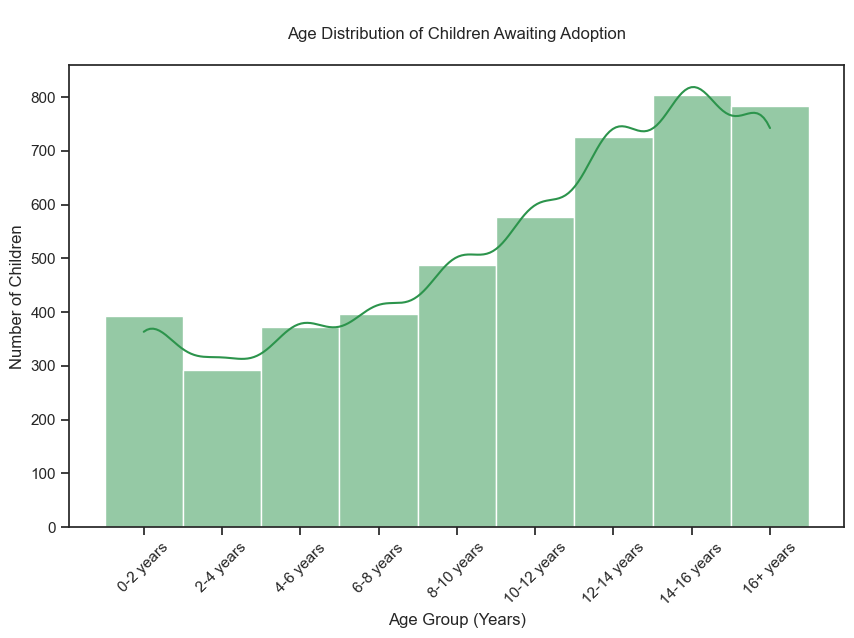

In [710]:
# set the theme and custom green color palette
sns.set_theme(style="ticks")
green_palette = sns.color_palette("Greens")

# histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=children_consolidated, x='age_group', kde=True, color=green_palette[4])
plt.title('\nAge Distribution of Children Awaiting Adoption\n')
plt.xlabel('Age Group (Years)')
plt.ylabel('Number of Children')
plt.xticks(rotation=45)
plt.show()

#### Distribution of Gender

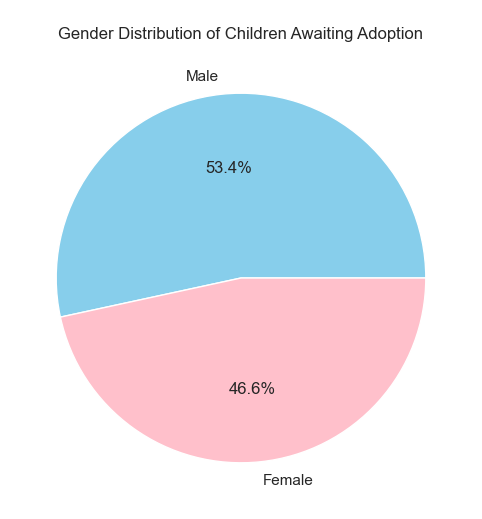

In [712]:
# calculate proportions for gender distribution
gender_counts = children_consolidated['gender'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
gender_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'pink'], labels=['Male', 'Female'])
plt.title('\nGender Distribution of Children Awaiting Adoption')
plt.ylabel('')
plt.show()

#### Distribution of Gender Across Different Age Ranges

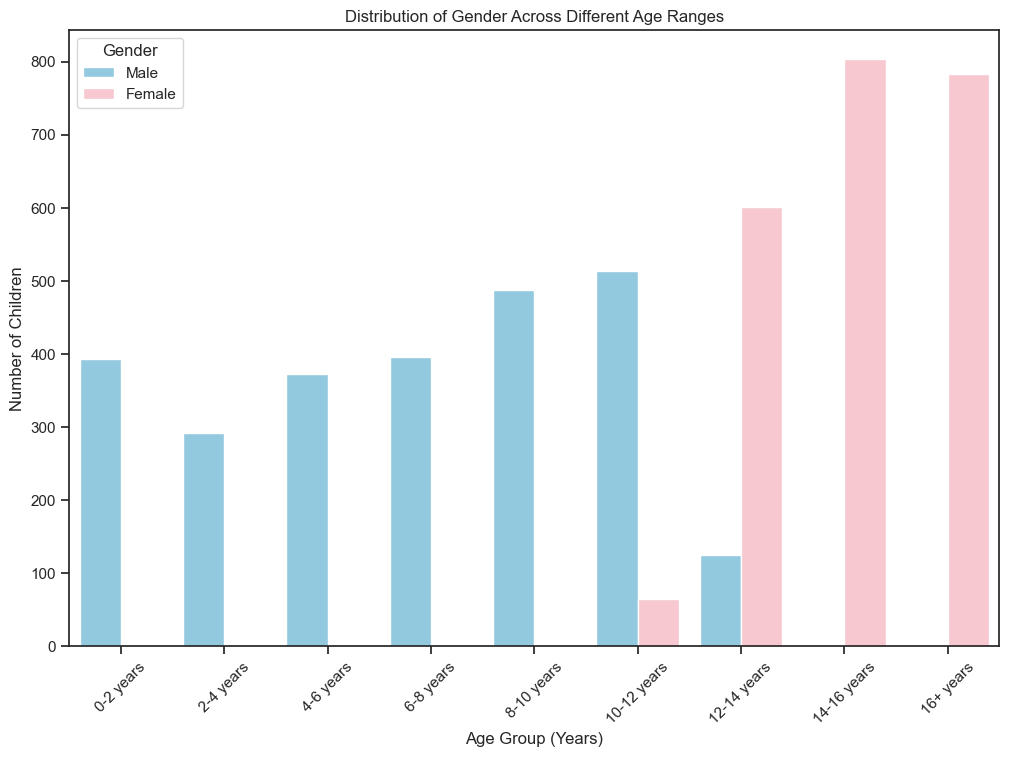

In [761]:
#creates a bar plot for gender distribution across different age ranges
plt.figure(figsize=(12, 8))
sns.countplot(data=children_consolidated, x='age_group', hue='gender', palette={'Male': 'skyblue', 'Female': 'pink'})
plt.title('Distribution of Gender Across Different Age Ranges')
plt.xlabel('Age Group (Years)')
plt.ylabel('Number of Children')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

### 7.1.2 Region and Ethnicity

In [715]:
# loads the shapefile
shapefile_path = f'{shapefile_dir}/04_limiteestadual1991.shp'
brazil_map = gpd.read_file(shapefile_path)

# displays the first few rows and columns to understand the structure
#print(brazil_map.head())
#print(brazil_map.columns)

state_code_to_name = {
    'RO': 'Rondônia',
    'AC': 'Acre',
    'AM': 'Amazonas',
    'RR': 'Roraima',
    'PA': 'Pará',
    'AP': 'Amapá',
    'TO': 'Tocantins',
    'MA': 'Maranhão',
    'PI': 'Piauí',
    'CE': 'Ceará',
    'RN': 'Rio Grande do Norte',
    'PB': 'Paraíba',
    'PE': 'Pernambuco',
    'AL': 'Alagoas',
    'SE': 'Sergipe',
    'BA': 'Bahia',
    'MG': 'Minas Gerais',
    'ES': 'Espírito Santo',
    'RJ': 'Rio de Janeiro',
    'SP': 'São Paulo',
    'PR': 'Paraná',
    'SC': 'Santa Catarina',
    'RS': 'Rio Grande do Sul',
    'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso',
    'GO': 'Goiás',
    'DF': 'Distrito Federal'
}

#### Geographical Distribution of Children Awaiting Adoption

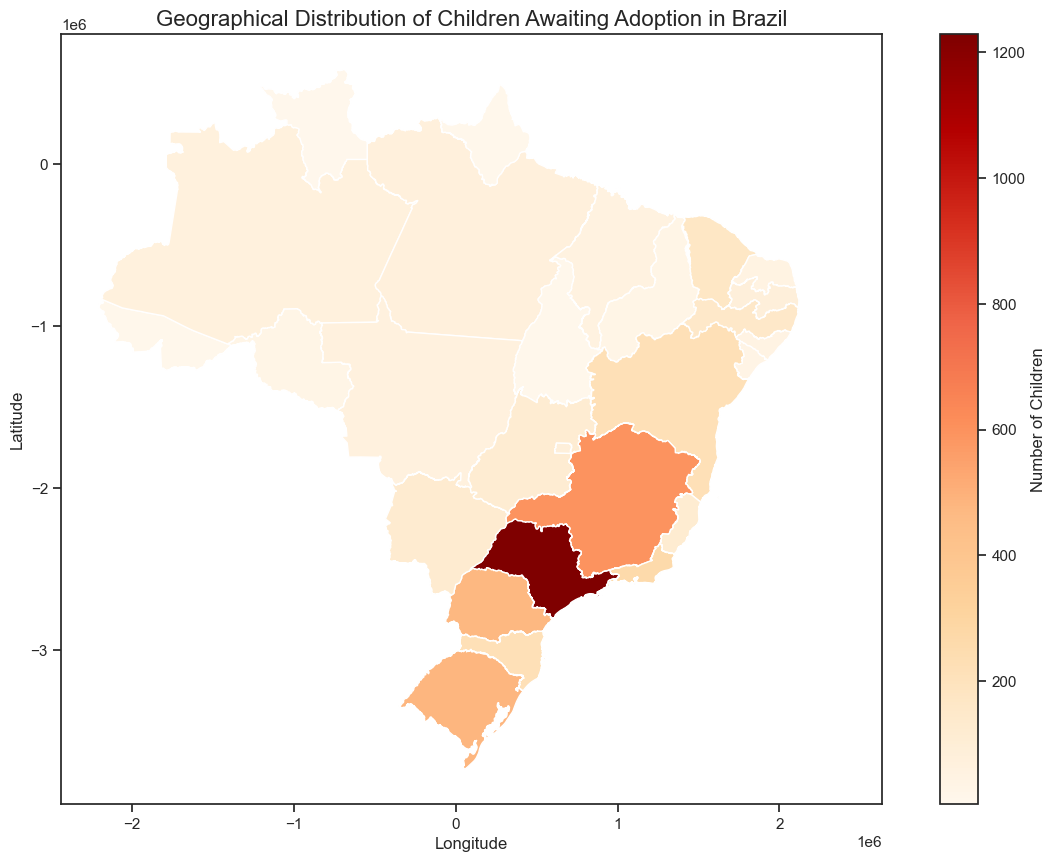

In [745]:
# adds state names to children_consolidated
children_consolidated['state_name'] = children_consolidated['UF'].map(state_code_to_name)

# counts number of children per state
state_counts = children_consolidated['state_name'].value_counts().reset_index()
state_counts.columns = ['nome', 'count']

if 'count' in brazil_map.columns:
    brazil_map = brazil_map.rename(columns={'count': 'existing_count'})

# merges the counts with the map
brazil_map = brazil_map.merge(state_counts, how='left', left_on='nome', right_on='nome')

# plots the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
brazil_map.plot(column='count', cmap='OrRd', legend=True, ax=ax, missing_kwds={"color": "lightgrey"})

# adds better descriptions
plt.title('Geographical Distribution of Children Awaiting Adoption in Brazil', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# adds legend title manually since get_legend() might not work
cax = fig.get_axes()[1]  # The colorbar axes is the second axes in the figure
cax.set_ylabel('Number of Children', fontsize=12)

plt.show()

#### Region Distribution of Children Awaiting Adoption

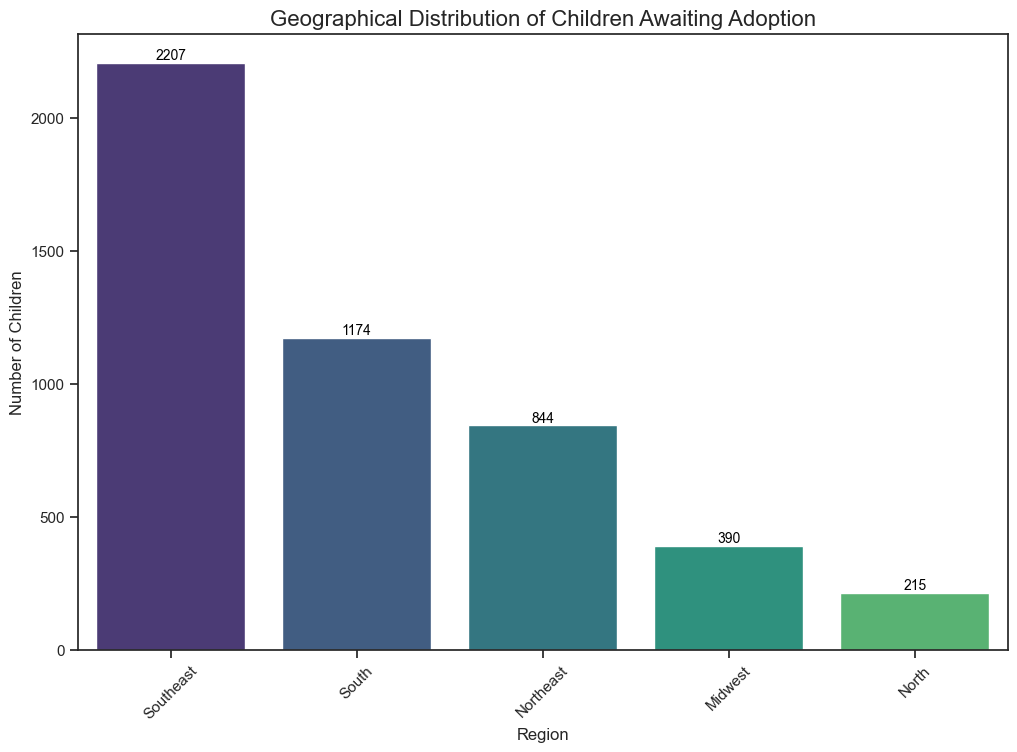

In [748]:
# geographical distribution of children
region_counts = children_consolidated['region'].value_counts()


green_palette = sns.color_palette("viridis")
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=region_counts.index, y=region_counts.values, palette=green_palette)

# adds totals on each bar
for i, count in enumerate(region_counts.values):
    bar_plot.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Geographical Distribution of Children Awaiting Adoption', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Children', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Ethnicity Distribution of Children Awaiting Adoption

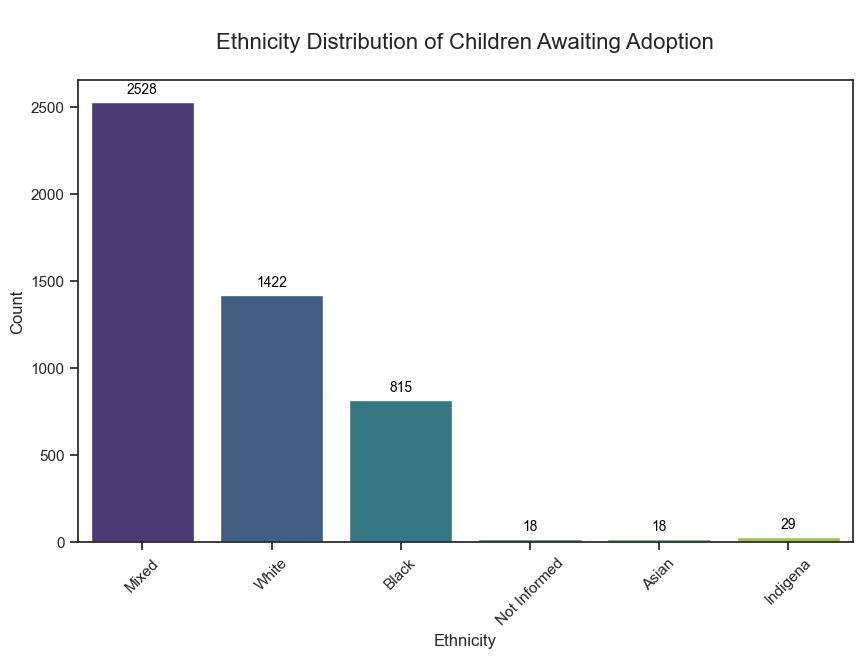

In [763]:
sns.set_theme(style="ticks")
green_palette = sns.color_palette("viridis")

# plots bar chart for ethnicity distribution
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(data=children_consolidated, x='ethnicity', palette=green_palette)

# adds totals on each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',
                      fontsize=10, color='black')

plt.title('\nEthnicity Distribution of Children Awaiting Adoption\n', fontsize=16)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

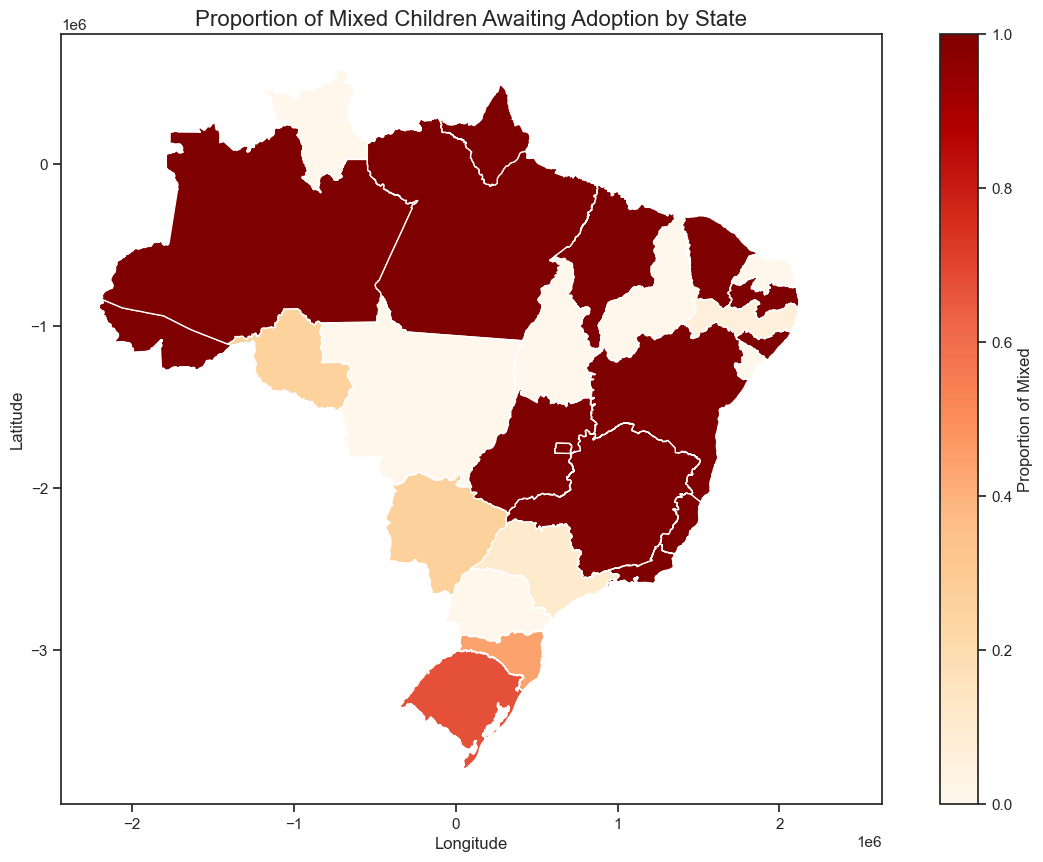

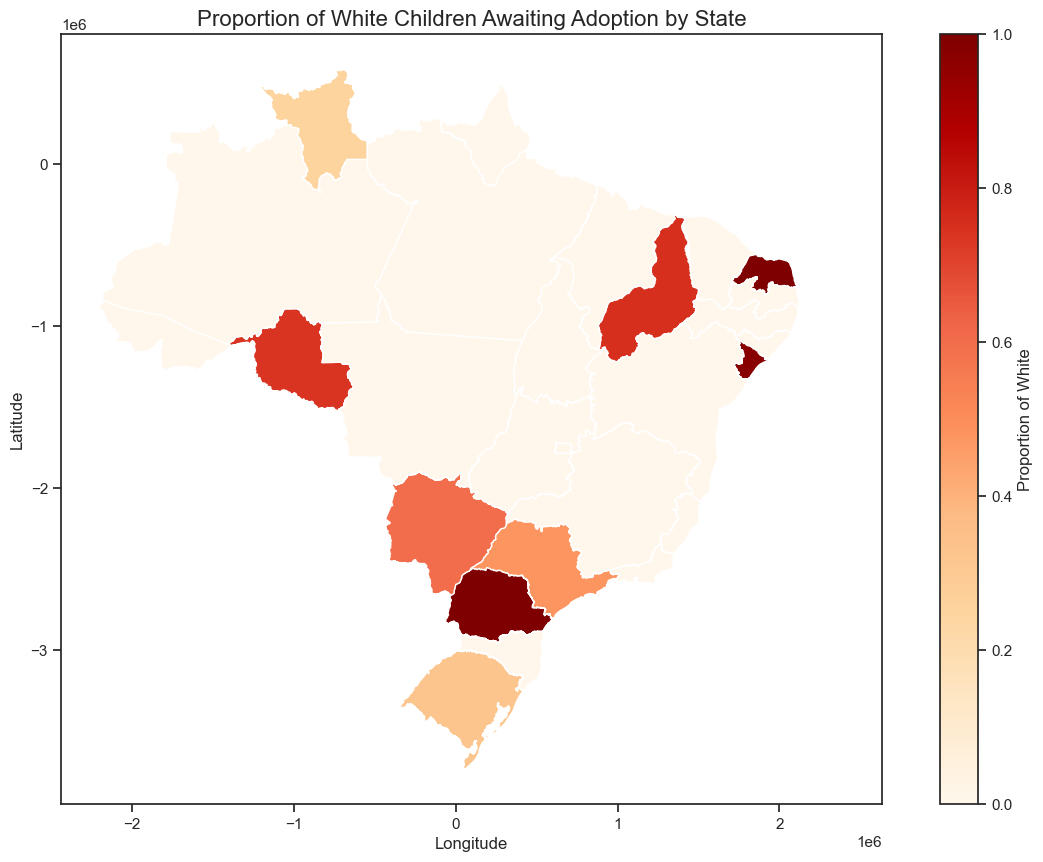

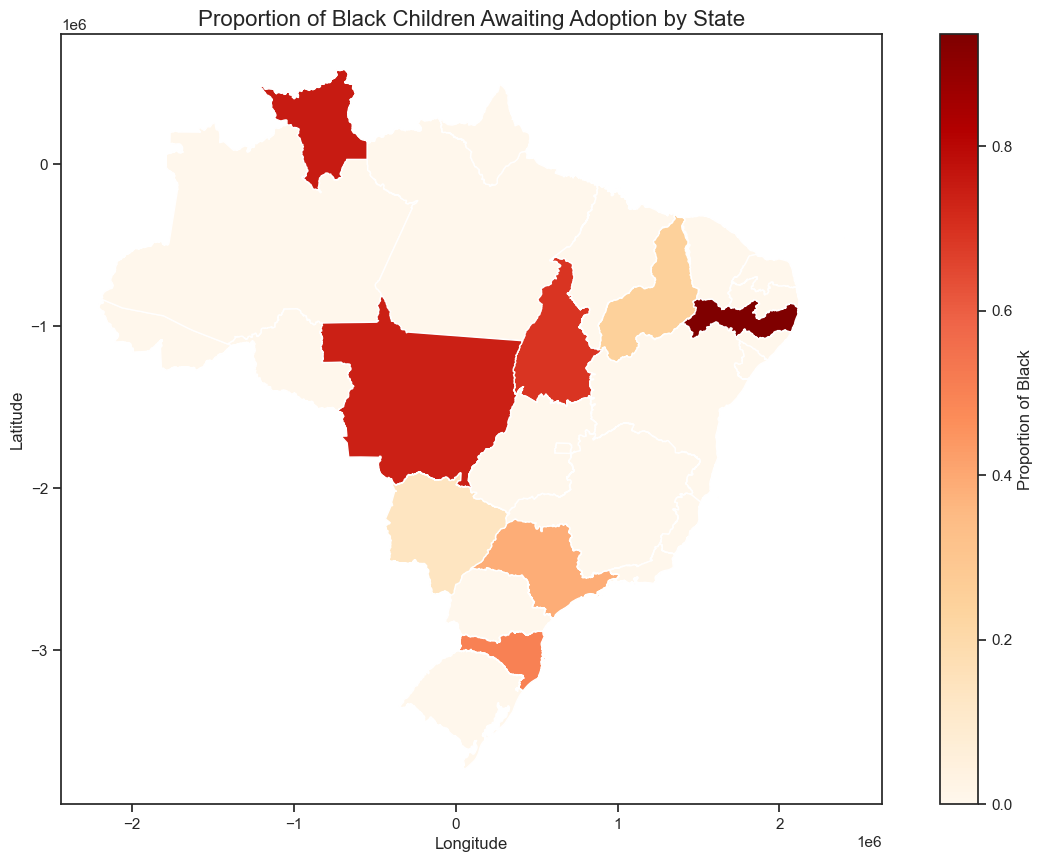

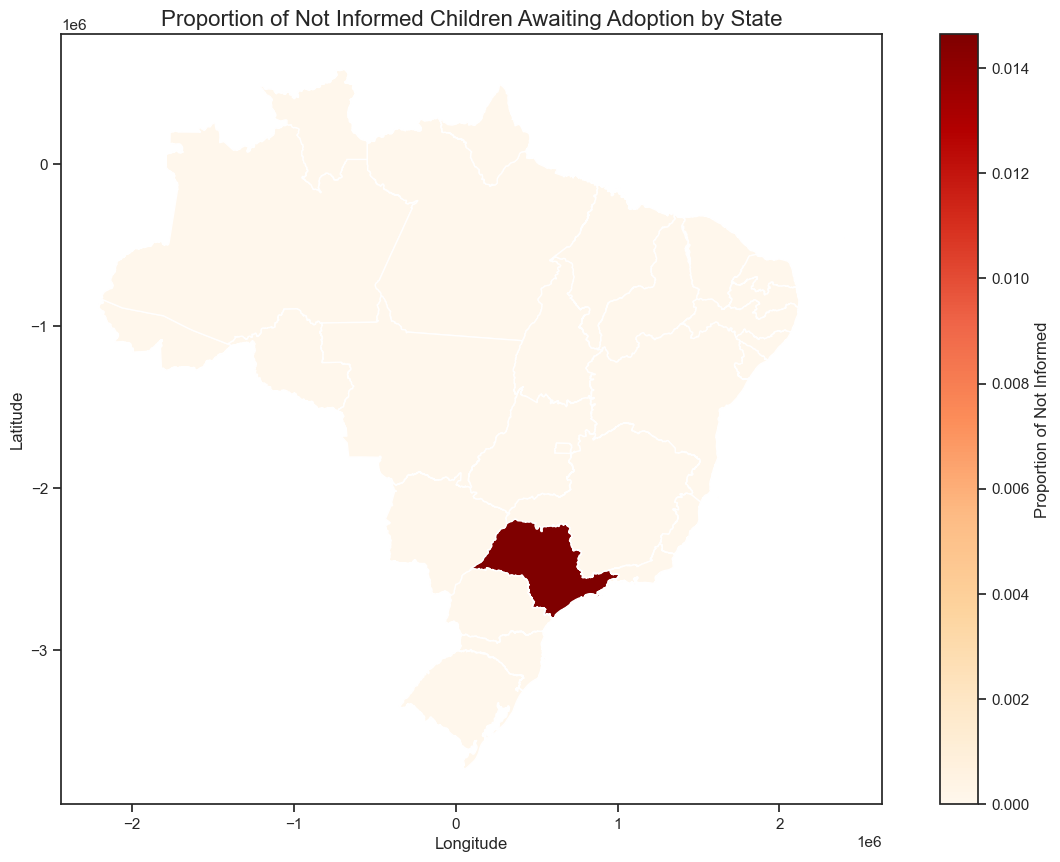

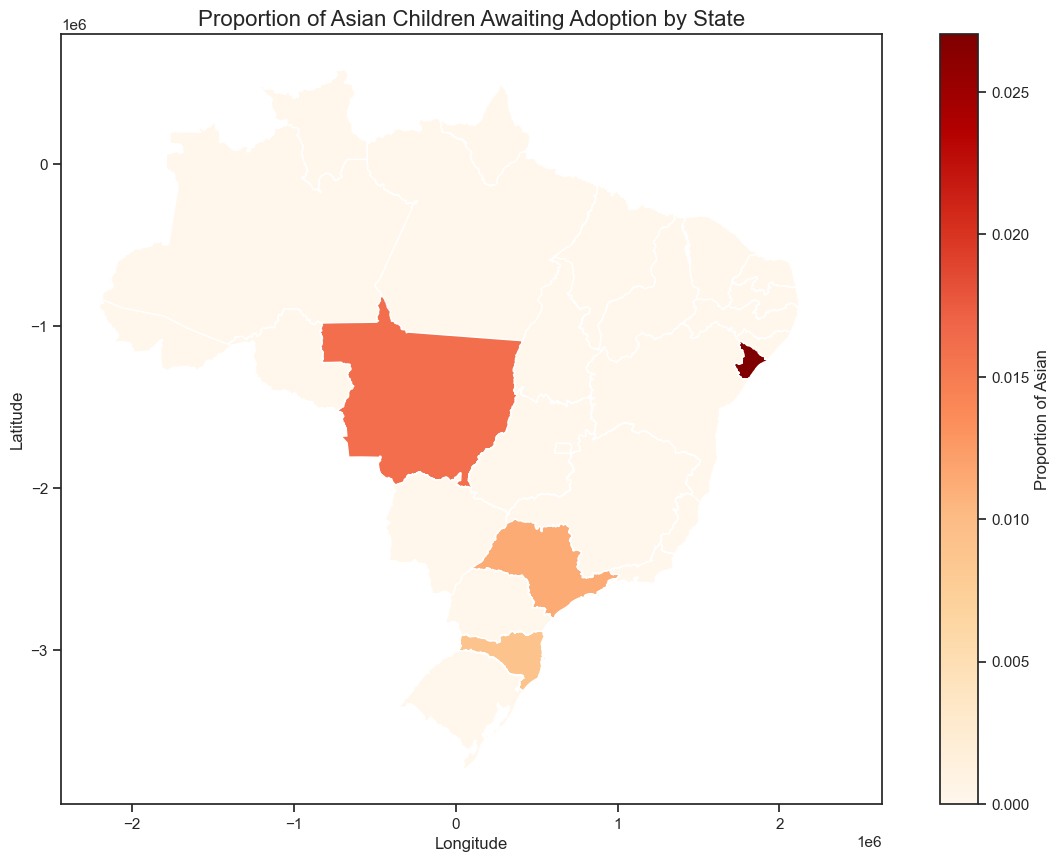

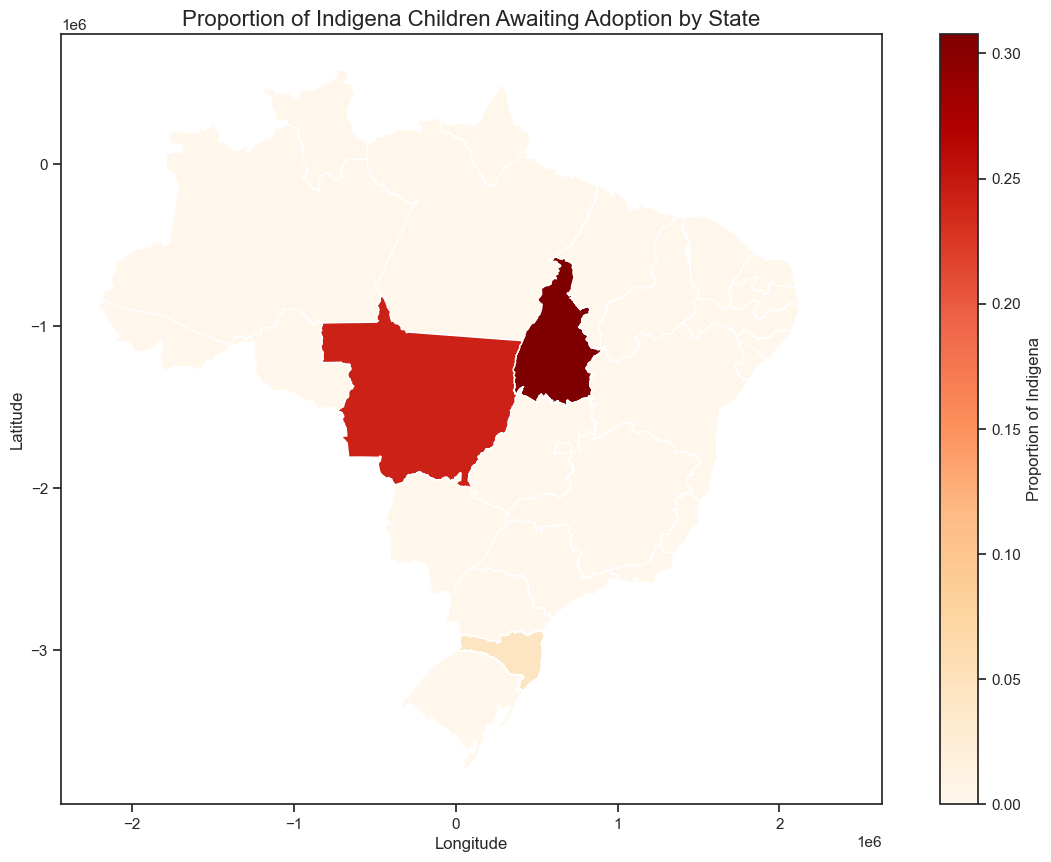

In [764]:
# adds state names to children_consolidated
children_consolidated['state_name'] = children_consolidated['UF'].map(state_code_to_name)

# calculates proportion of each ethnicity by state
ethnicity_proportions = children_consolidated.groupby(['state_name', 'ethnicity']).size().unstack().fillna(0)
ethnicity_proportions = ethnicity_proportions.div(ethnicity_proportions.sum(axis=1), axis=0)

# plots each ethnicity proportionally in map
def plot_ethnicity_proportion(ethnicity):
    merged_data = brazil_map.set_index('nome').join(ethnicity_proportions[ethnicity], how='left').fillna(0)
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data.plot(column=ethnicity, cmap='OrRd', legend=True, ax=ax,
                     legend_kwds={'label': f'Proportion of {ethnicity}'},
                     missing_kwds={"color": "lightgrey"})
    plt.title(f'Proportion of {ethnicity} Children Awaiting Adoption by State', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.show()

# plots each ethnicity
for ethnicity in children_consolidated['ethnicity'].unique():
    plot_ethnicity_proportion(ethnicity)

#### Stacked bar chart: Distribution of Ethnicity within Each Age Group

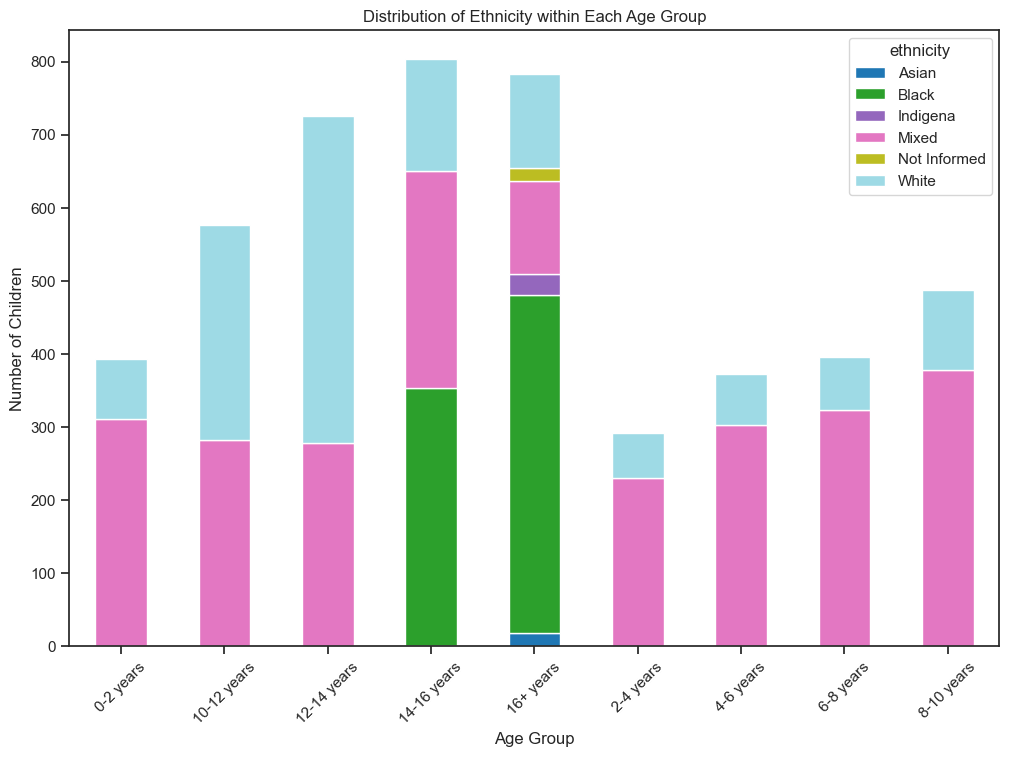

In [752]:
# stacked bar chart for ethnicity within each age group
ethnicity_age_group = children_consolidated.groupby(['age_group', 'ethnicity']).size().unstack()

ethnicity_age_group.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribution of Ethnicity within Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Children')
plt.xticks(rotation=45)
plt.show()

### 7.1.3 Siblings

#### Bar Chart: Distribution of the Number of Siblings

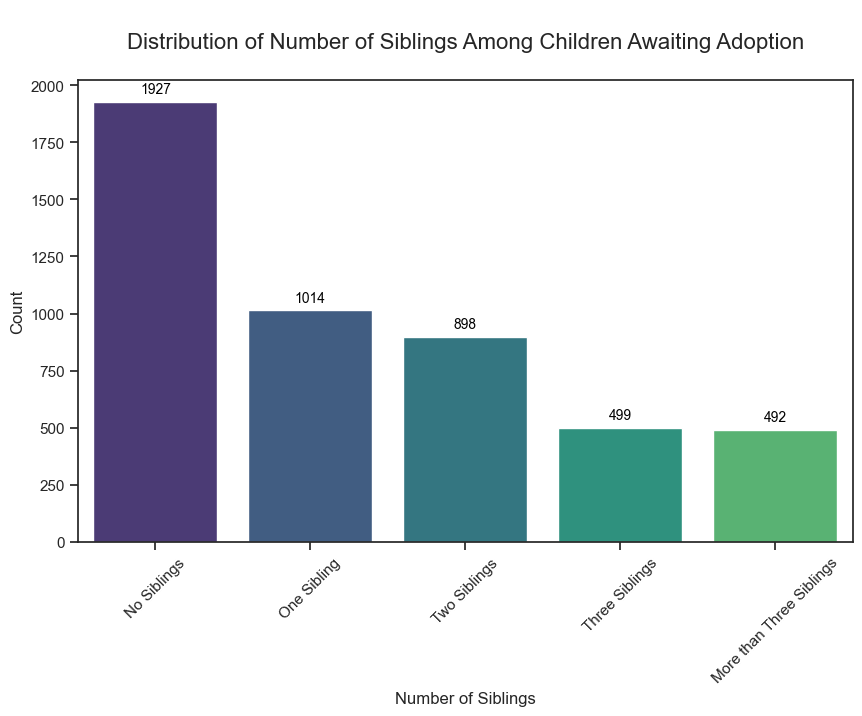

In [768]:
# plots bar chart for siblings distribution
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(data=children_consolidated, x='siblings', palette=green_palette)

# adds totals on each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points',
                      fontsize=10, color='black')

plt.title('\nDistribution of Number of Siblings Among Children Awaiting Adoption\n', fontsize=16)
plt.xlabel('Number of Siblings', fontsize=12)
plt.ylabel('Number of Children', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Pie Chart: Proportion of Children with and without Siblings

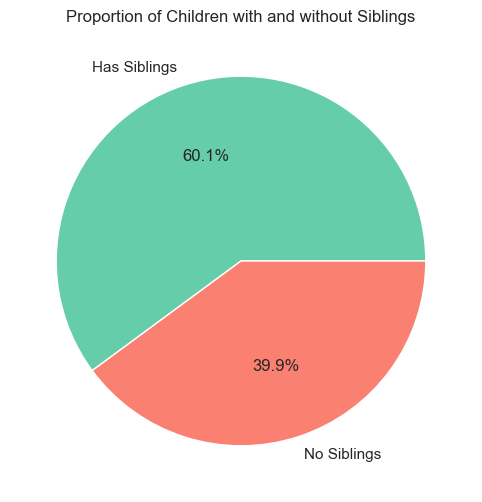

In [779]:
# creates a new column to indicate if a child has siblings or not
children_consolidated['has_siblings'] = children_consolidated['siblings'].apply(lambda x: 'No Siblings' if x == 'No Siblings' else 'Has Siblings')

# calculates proportions
siblings_counts = children_consolidated['has_siblings'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
siblings_counts.plot.pie(autopct='%1.1f%%', colors=['mediumaquamarine', 'salmon'])
plt.title('Proportion of Children with and without Siblings')
plt.ylabel('')
plt.show()

### 7.1.4 Disability and Diseases

#### Bar Chart: Disability Distribution of Children Awaiting Adoption


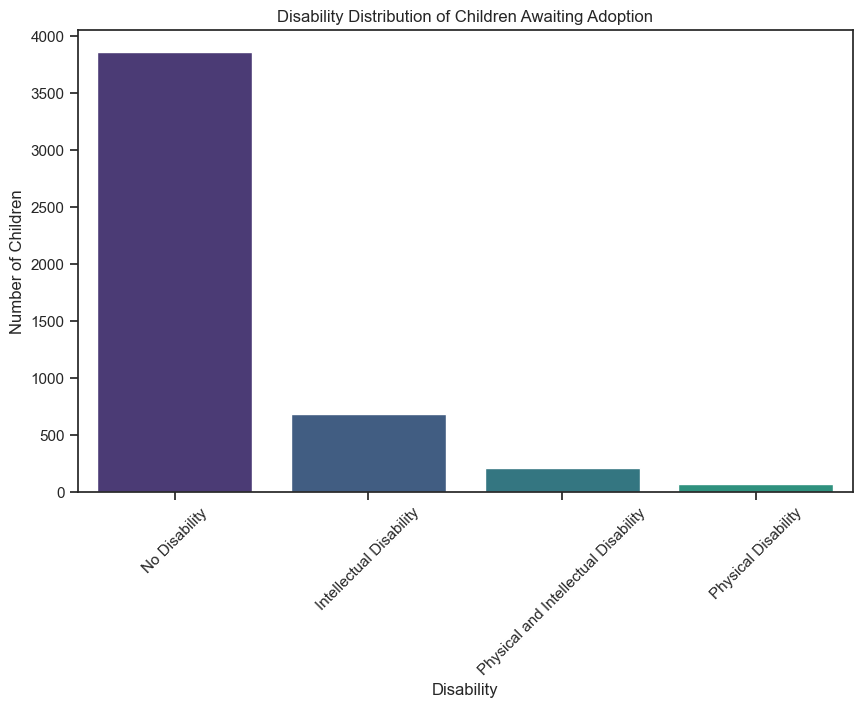

In [780]:
# bar chart for disability distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=children_consolidated, x='disability', palette=green_palette)
plt.title('Disability Distribution of Children Awaiting Adoption')
plt.xlabel('Disability')
plt.ylabel('Number of Children')
plt.xticks(rotation=45)
plt.show()

#### Pie Chart: Disability Proportion Distribution of Children Awaiting Adoption

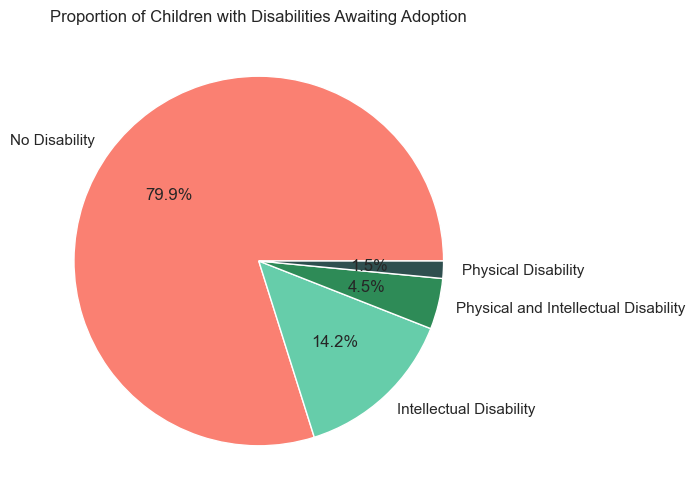

In [811]:
# disability distribution
disability_counts = children_consolidated['disability'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
disability_counts.plot.pie(autopct='%1.1f%%', colors=['salmon', 'mediumaquamarine', 'seagreen', 'darkslategrey'])
plt.title('Proportion of Children with Disabilities Awaiting Adoption')
plt.ylabel('')
plt.show()

In [ ]:
Infectious Diseases

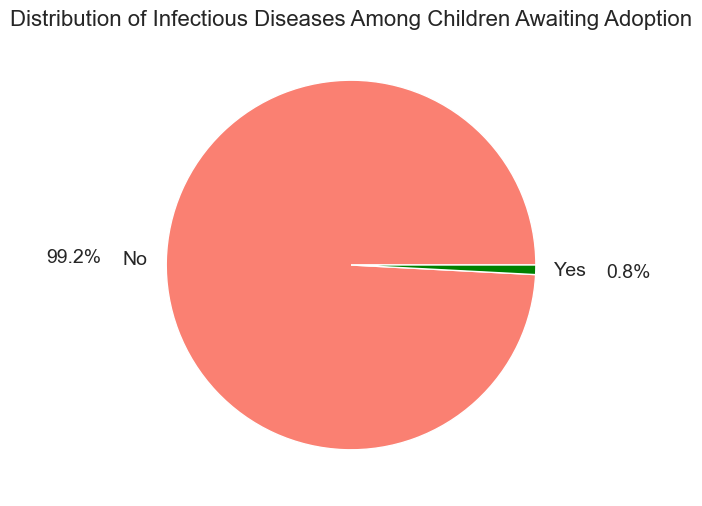

In [810]:
# calculates proportions for infectious diseases distribution
infectious_diseases_counts = children_consolidated['infectious_disease'].value_counts()

# plots pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    infectious_diseases_counts, 
    labels=infectious_diseases_counts.index, 
    autopct='%1.1f%%', 
    colors=['salmon', 'green'], 
    textprops={'fontsize': 14},
    pctdistance=1.5  # distance adjusted for readability
)
plt.title('Distribution of Infectious Diseases Among Children Awaiting Adoption', fontsize=16)
plt.show()

### Conclusion
🚨 NEED TO WRITE

***
### 7.2 What are the preferences of prospective adoptive parents in Brazil regarding the characteristics of children they wish to adopt?

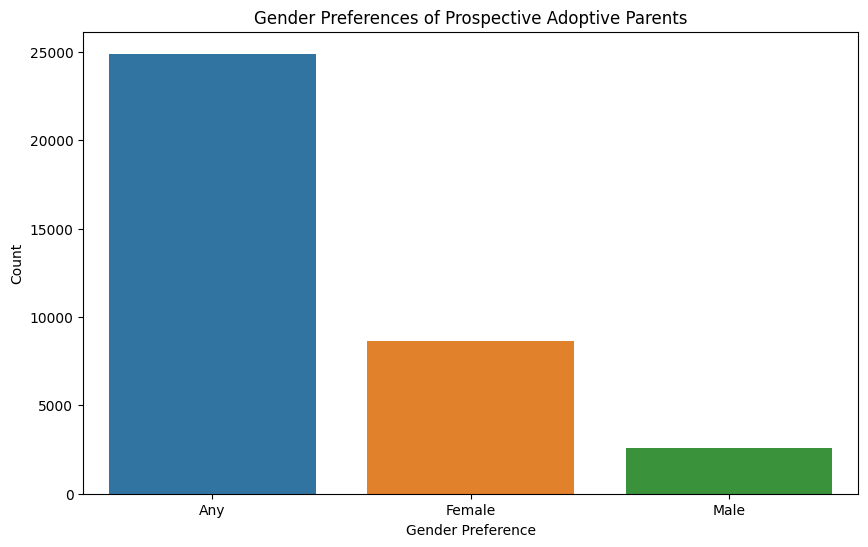

In [615]:
#### Bar Chart: Preferences for Gender
# Bar chart for gender preference
plt.figure(figsize=(10, 6))
sns.countplot(data=parents_consolidated, x='gender_preference')
plt.title('Gender Preferences of Prospective Adoptive Parents')
plt.xlabel('Gender Preference')
plt.ylabel('Number of Parents')
plt.show()

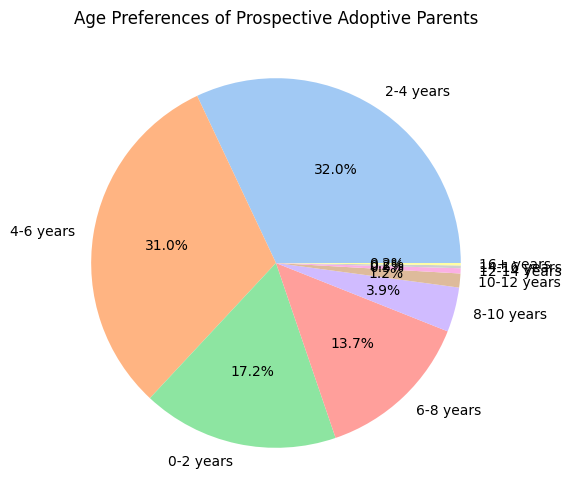

In [616]:
#### Pie Chart: Preferences for Age
# Calculate proportions for age preferences
age_preference_counts = parents_consolidated['age_preference'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
age_preference_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Age Preferences of Prospective Adoptive Parents')
plt.ylabel('')
plt.show()

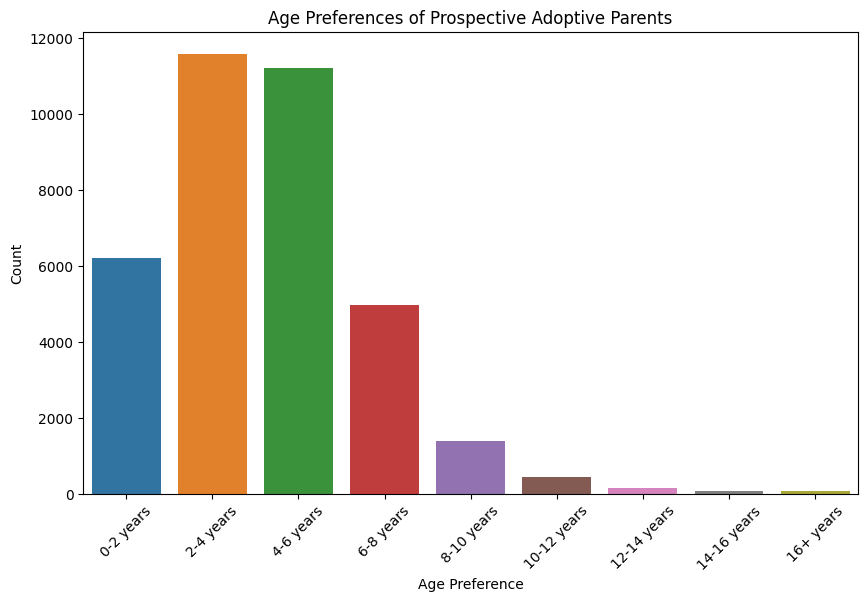

In [622]:
#### Bar Chart: Preferences for Age

# Bar chart for age preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=parents_consolidated, x='age_preference')
plt.title('Age Preferences of Prospective Adoptive Parents')
plt.xlabel('Age Preference')
plt.ylabel('Number of Parents')
plt.xticks(rotation=45)
plt.show()

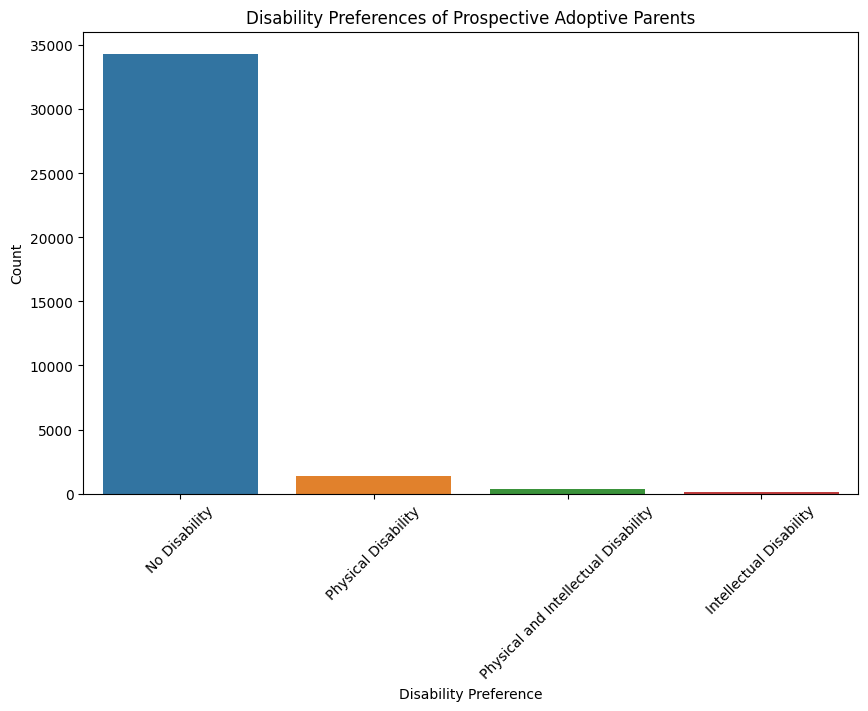

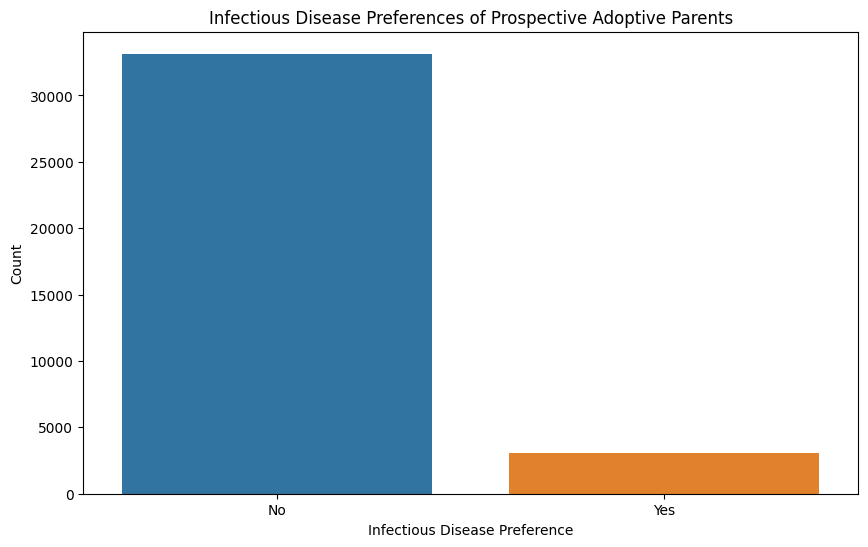

In [617]:
#### Bar Chart: Preferences for Disability and Infectious Diseases
# Bar chart for disability preference
plt.figure(figsize=(10, 6))
sns.countplot(data=parents_consolidated, x='disability_preference')
plt.title('Disability Preferences of Prospective Adoptive Parents')
plt.xlabel('Disability Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar chart for infectious disease preference
plt.figure(figsize=(10, 6))
sns.countplot(data=parents_consolidated, x='infectious_disease_preference')
plt.title('Infectious Disease Preferences of Prospective Adoptive Parents')
plt.xlabel('Infectious Disease Preference')
plt.ylabel('Count')
plt.show()

<Figure size 1500x1000 with 0 Axes>

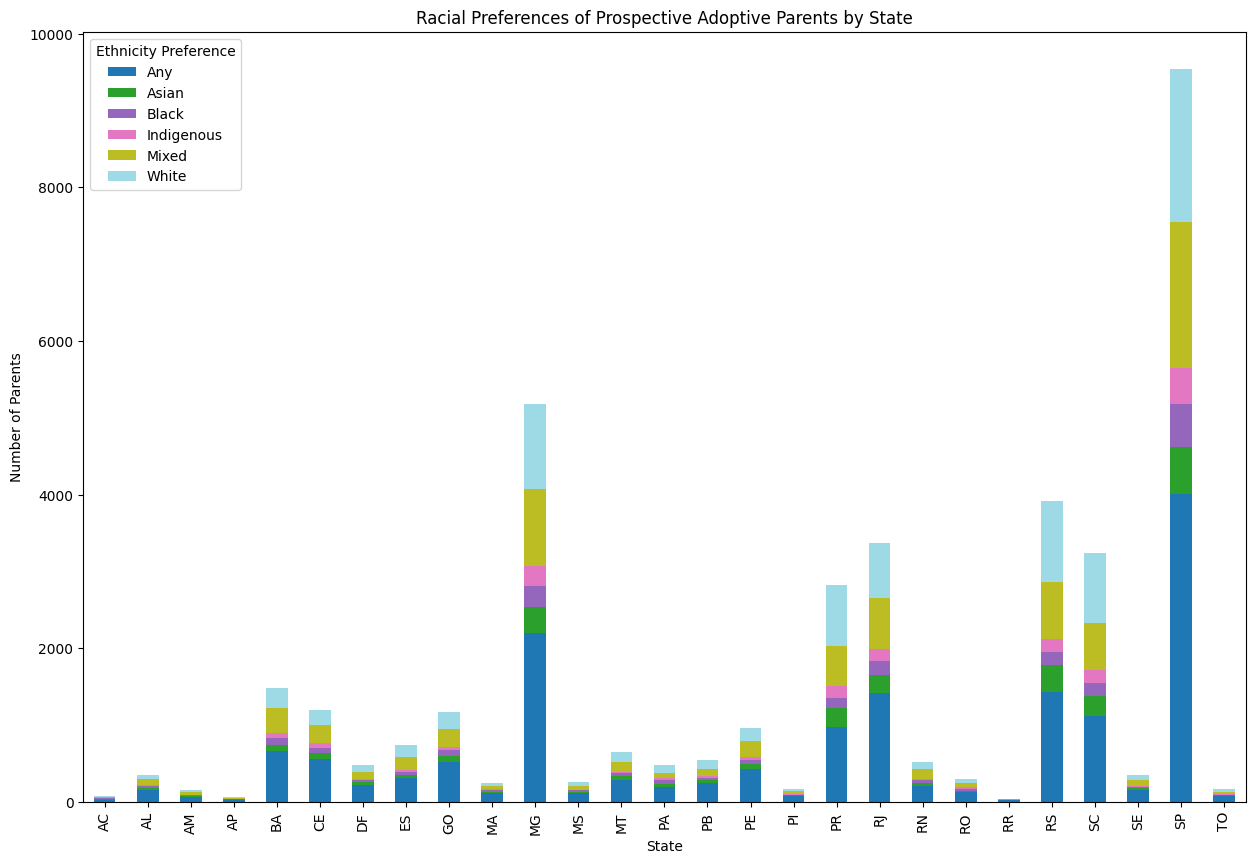

In [619]:
#### Stacked Bar Chart: Racial Preferences Broken Down by States

# Expand ethnicity preferences into individual rows
parents_exploded = parents_consolidated.explode('ethnicity_preference')

# Group by UF and ethnicity_preference and count occurrences
ethnicity_state_group = parents_exploded.groupby(['UF', 'ethnicity_preference']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 10))
ethnicity_state_group.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')
plt.title('Racial Preferences of Prospective Adoptive Parents by State')
plt.xlabel('State')
plt.ylabel('Number of Parents')
plt.xticks(rotation=90)
plt.legend(title='Ethnicity Preference')
plt.show()

<Figure size 1500x1000 with 0 Axes>

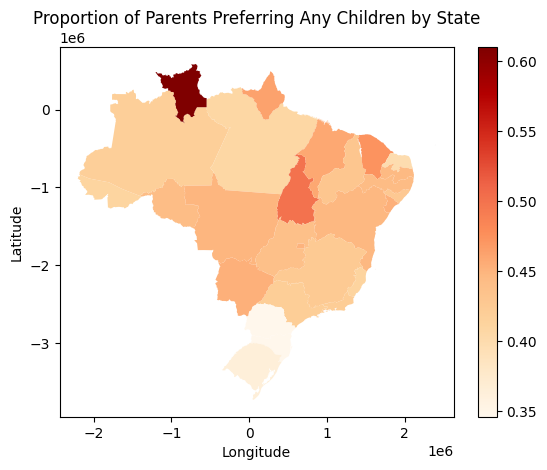

<Figure size 1500x1000 with 0 Axes>

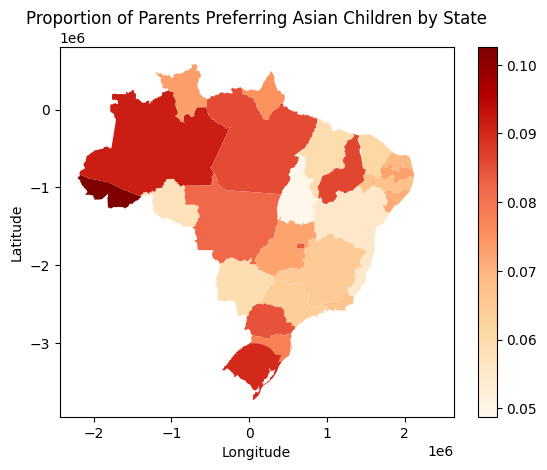

<Figure size 1500x1000 with 0 Axes>

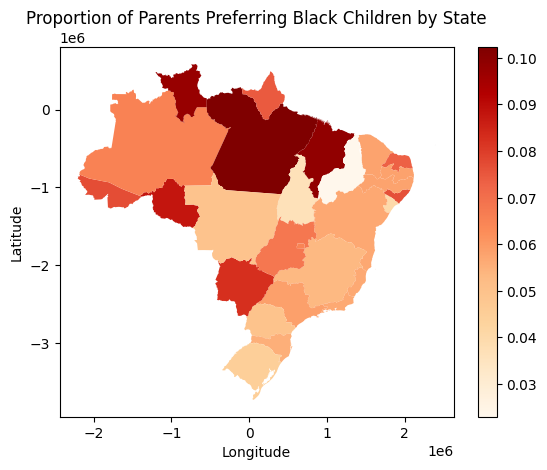

<Figure size 1500x1000 with 0 Axes>

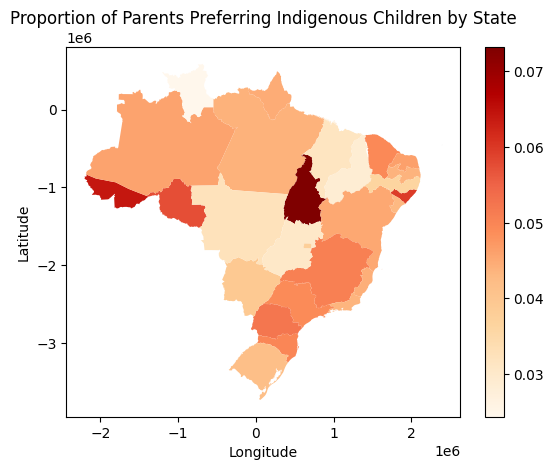

<Figure size 1500x1000 with 0 Axes>

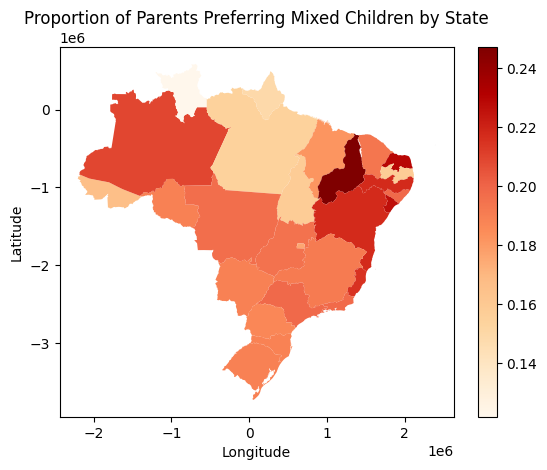

<Figure size 1500x1000 with 0 Axes>

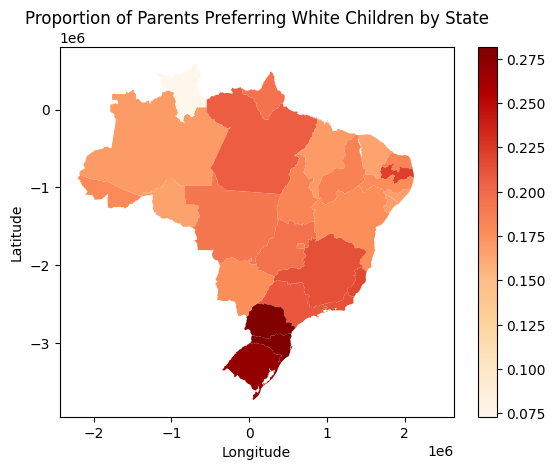

In [620]:
# Add state names to parents_consolidated
parents_consolidated['state_name'] = parents_consolidated['UF'].map(state_code_to_name)

# Explode ethnicity preferences into individual rows
parents_exploded = parents_consolidated.explode('ethnicity_preference')

# Calculate the proportion of each ethnicity preference for each state
ethnicity_state_proportion = parents_exploded.groupby(['state_name', 'ethnicity_preference']).size().unstack(fill_value=0)
ethnicity_state_proportion = ethnicity_state_proportion.div(ethnicity_state_proportion.sum(axis=1), axis=0)

# Function to plot choropleth map for a given ethnicity
def plot_ethnicity_choropleth(ethnicity):
    brazil_map_copy = brazil_map.copy()
    brazil_map_copy = brazil_map_copy.merge(ethnicity_state_proportion[ethnicity], how='left', left_on='nome', right_index=True)
    
    plt.figure(figsize=(15, 10))
    brazil_map_copy.plot(column=ethnicity, cmap='OrRd', legend=True, missing_kwds={"color": "lightgrey"})
    plt.title(f'Proportion of Parents Preferring {ethnicity} Children by State')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# List of ethnicities to plot
ethnicities = ethnicity_state_proportion.columns

# Plot choropleth maps for each ethnicity
for ethnicity in ethnicities:
    plot_ethnicity_choropleth(ethnicity)

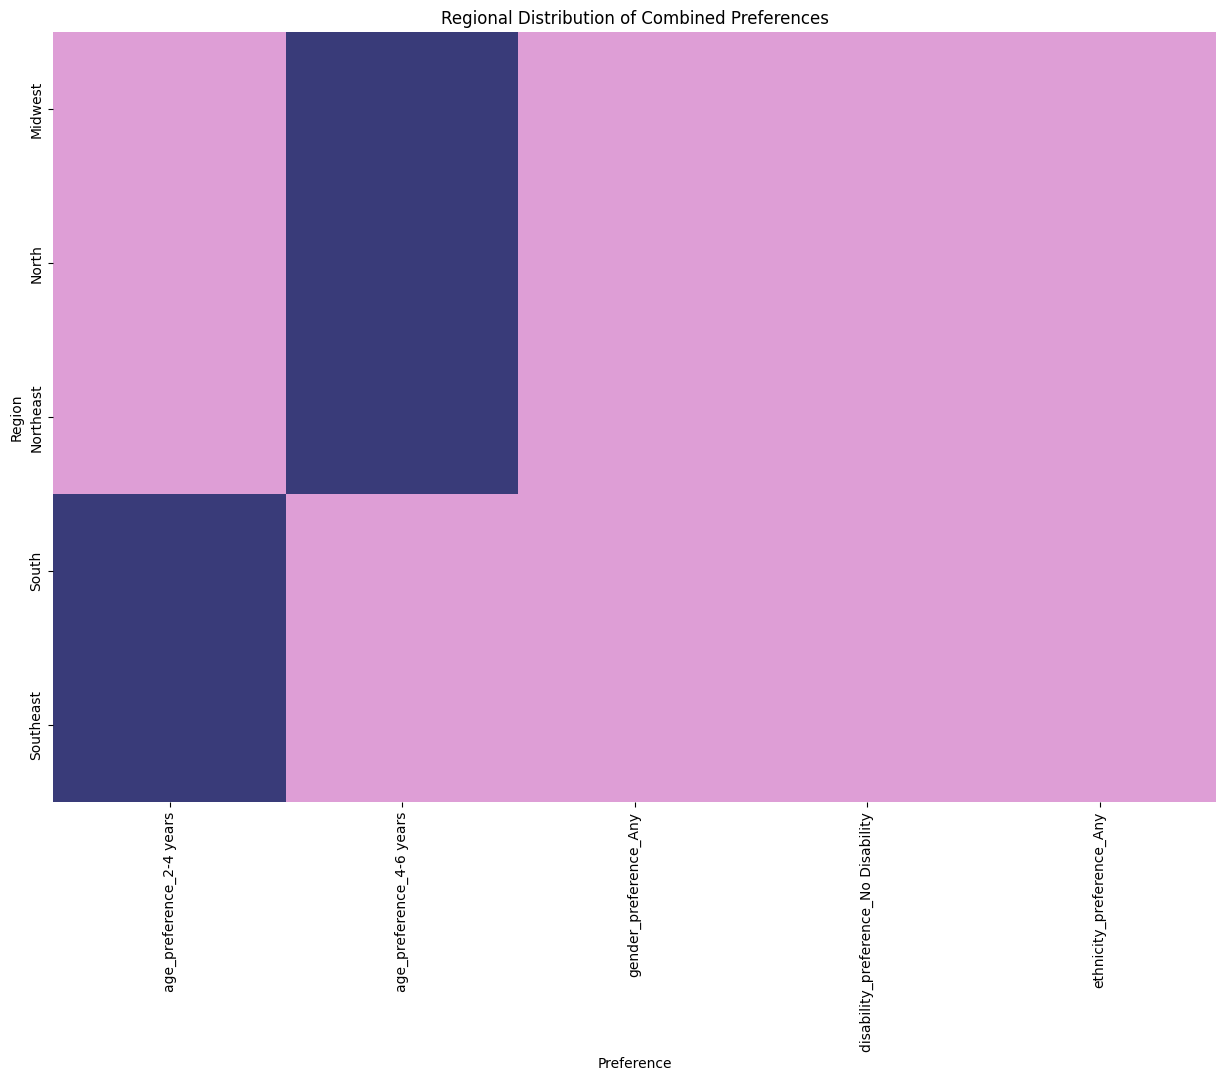

In [629]:
#### Heatmap: Regional Distribution of Combined Preferences

# Group by region and calculate the most common preferences
region_preferences = parents_consolidated.groupby('region').agg({
    'age_preference': lambda x: x.value_counts().index[0],
    'gender_preference': lambda x: x.value_counts().index[0],
    'disability_preference': lambda x: x.value_counts().index[0],
    'ethnicity_preference': lambda x: x.explode().value_counts().index[0]  # Handle list entries
}).reset_index()

# Convert the categorical preferences into a one-hot encoded DataFrame
preferences_dummies = pd.get_dummies(region_preferences.set_index('region'))

plt.figure(figsize=(15, 10))
sns.heatmap(preferences_dummies, cmap='tab20b', cbar=False)
plt.title('Regional Distribution of Combined Preferences')
plt.xlabel('Preference')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.show()

## How does the match rate between the characteristics of children available for adoption and the preferences of adoptive parents vary across different regions of Brazil?

In [637]:
def calculate_match_rate(children, parents):
    match_counts = {
        'region': [],
        'age': [],
        'gender': [],
        'ethnicity': [],
        'disability': [],
        'siblings': [],
        'infectious_disease': []
    }

    for region in children['region'].unique():
        children_region = children[children['region'] == region]
        parents_region = parents[parents['region'] == region]
        
        match_counts['region'].append(region)
        
        # Calculate age match rate
        age_match = sum(parents_region['age_preference'].apply(lambda x: any(x == child_age for child_age in children_region['age_group'].unique()))) / len(parents_region)
        match_counts['age'].append(age_match)
        
        # Calculate gender match rate
        gender_match = sum(parents_region['gender_preference'].apply(lambda x: x in children_region['gender'].values)) / len(parents_region)
        match_counts['gender'].append(gender_match)
        
        # Calculate ethnicity match rate
        ethnicity_match = sum(parents_region['ethnicity_preference'].apply(lambda x: any(item in x for item in children_region['ethnicity'].values))) / len(parents_region)
        match_counts['ethnicity'].append(ethnicity_match)
        
        # Calculate disability match rate
        disability_match = sum(parents_region['disability_preference'].apply(lambda x: x in children_region['disability'].values)) / len(parents_region)
        match_counts['disability'].append(disability_match)

        # Calculate siblings match rate
        siblings_match = sum(parents_region['accepted_quantity'].apply(lambda x: any(x == child_siblings for child_siblings in children_region['siblings'].unique()))) / len(parents_region)
        match_counts['siblings'].append(siblings_match)

        # Calculate infectious disease match rate
        infectious_disease_match = sum(parents_region['infectious_disease_preference'].apply(lambda x: x in children_region['infectious_disease'].values)) / len(parents_region)
        match_counts['infectious_disease'].append(infectious_disease_match)

    return pd.DataFrame(match_counts)

# Calculate match rates
match_rates = calculate_match_rate(children_consolidated, parents_consolidated)


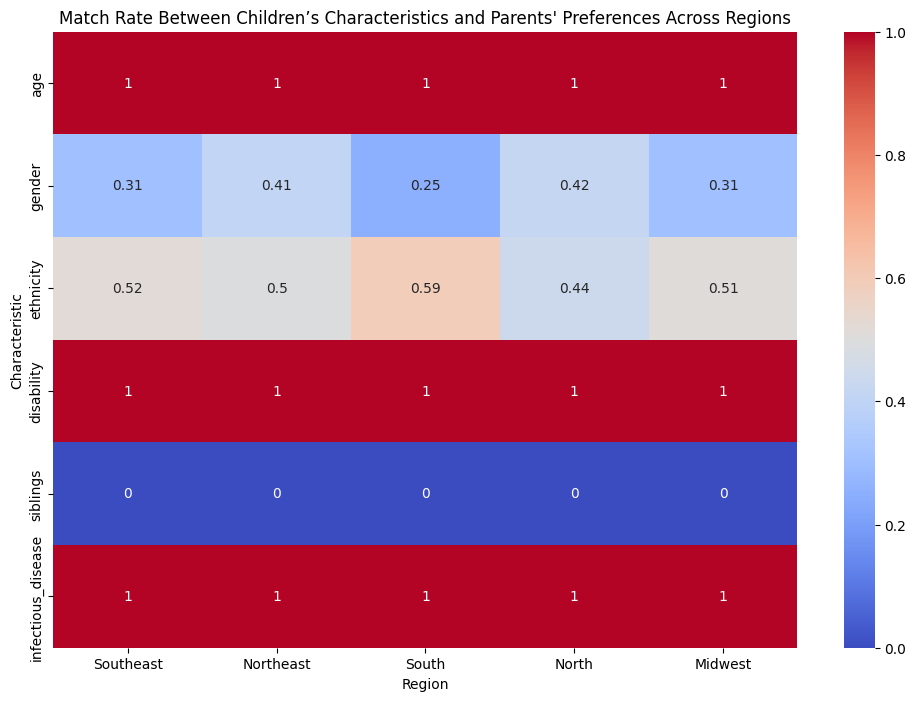

In [638]:
# Heatmap Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(match_rates.set_index('region').T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Match Rate Between Children’s Characteristics and Parents\' Preferences Across Regions')
plt.xlabel('Region')
plt.ylabel('Characteristic')
plt.show()

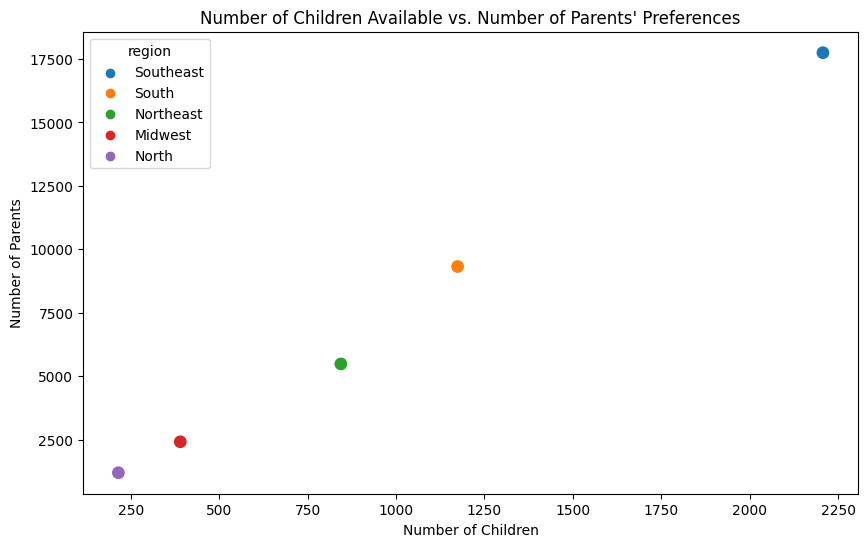

In [632]:
#### Scatter Plot: Number of Children Available vs. Number of Parents’ Preferences

# Calculate the number of children and parents in each region
children_counts = children_consolidated['region'].value_counts().reset_index()
children_counts.columns = ['region', 'children_count']

parents_counts = parents_consolidated['region'].value_counts().reset_index()
parents_counts.columns = ['region', 'parents_count']

# Merge counts into a single DataFrame
counts_merged = pd.merge(children_counts, parents_counts, on='region')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=counts_merged, x='children_count', y='parents_count', hue='region', s=100, palette='tab10')
plt.title('Number of Children Available vs. Number of Parents\' Preferences')
plt.xlabel('Number of Children')
plt.ylabel('Number of Parents')
plt.show()

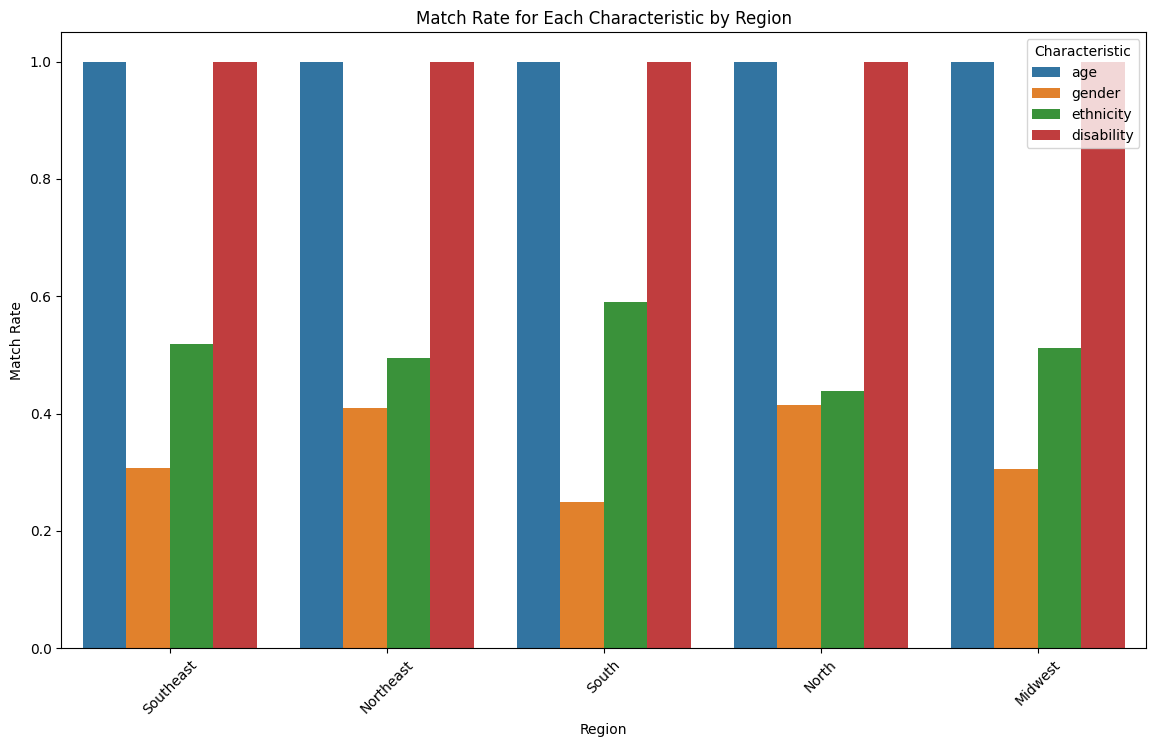

In [633]:
#### Bar Chart: Match Rate for Each Characteristic by Region

# Melt the match_rates DataFrame for easier plotting with seaborn
match_rates_melted = match_rates.melt(id_vars='region', var_name='characteristic', value_name='match_rate')

# Bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=match_rates_melted, x='region', y='match_rate', hue='characteristic')
plt.title('Match Rate for Each Characteristic by Region')
plt.xlabel('Region')
plt.ylabel('Match Rate')
plt.legend(title='Characteristic')
plt.xticks(rotation=45)
plt.show()

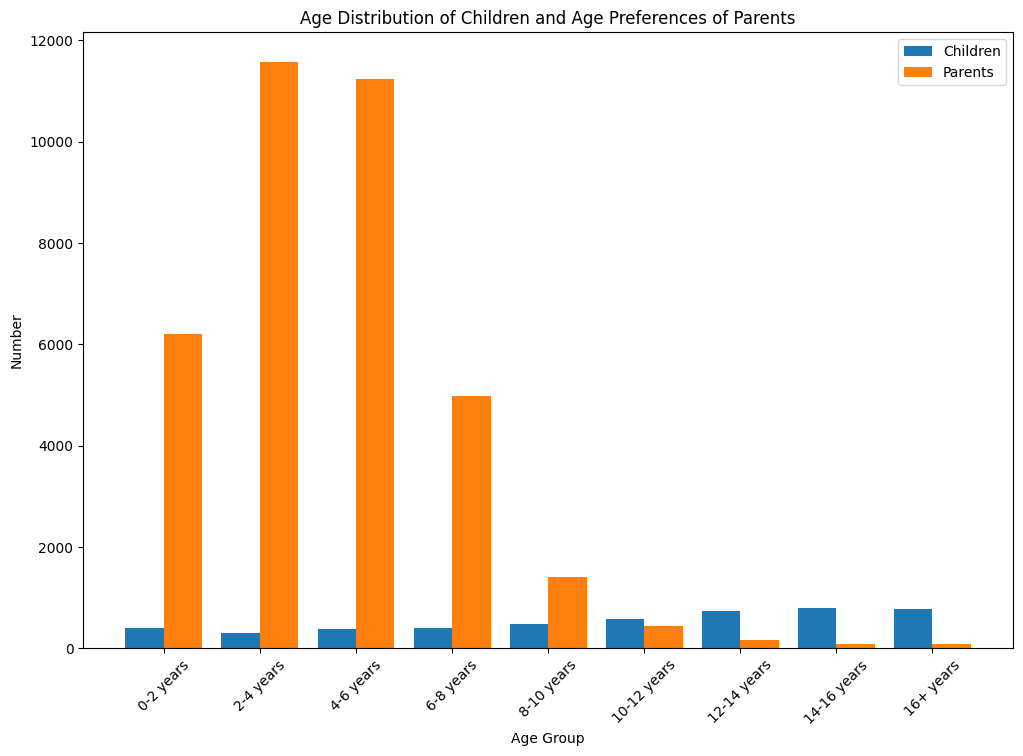

In [640]:
# Ensure the age groups are ordered from youngest to oldest
age_order = ['0-2 years', '2-4 years', '4-6 years', '6-8 years', '8-10 years', '10-12 years', '12-14 years', '14-16 years', '16+ years']

# Create data for children
children_age_counts = children_consolidated['age_group'].value_counts().reindex(age_order).fillna(0)

# Create data for parents
parents_age_preferences = parents_consolidated['age_preference'].value_counts().reindex(age_order).fillna(0)

# Combine into a DataFrame for plotting
combined_data = pd.DataFrame({
    'Age Group': age_order,
    'Number of Children': children_age_counts.values,
    'Number of Parents': parents_age_preferences.values
})

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.4
index = range(len(age_order))

# Bar chart for children
plt.bar(index, combined_data['Number of Children'], bar_width, label='Children')

# Bar chart for parents
plt.bar([i + bar_width for i in index], combined_data['Number of Parents'], bar_width, label='Parents')

plt.xlabel('Age Group')
plt.ylabel('Number')
plt.title('Age Distribution of Children and Age Preferences of Parents')
plt.xticks([i + bar_width / 2 for i in index], age_order, rotation=45)
plt.legend()
plt.show()

Children's reclassified siblings data:
siblings_reclassified
1        1927
above    1889
2        1014
Name: count, dtype: int64
Parents' quantity preferences data:
accepted_quantity_reclassified
1        22251
2        13069
above      863
Name: count, dtype: int64
Combined data for plotting:
  Siblings/Quantity  Number of Children  Number of Parents
0                 1                1927              22251
1                 2                1014              13069
2             above                1889                863


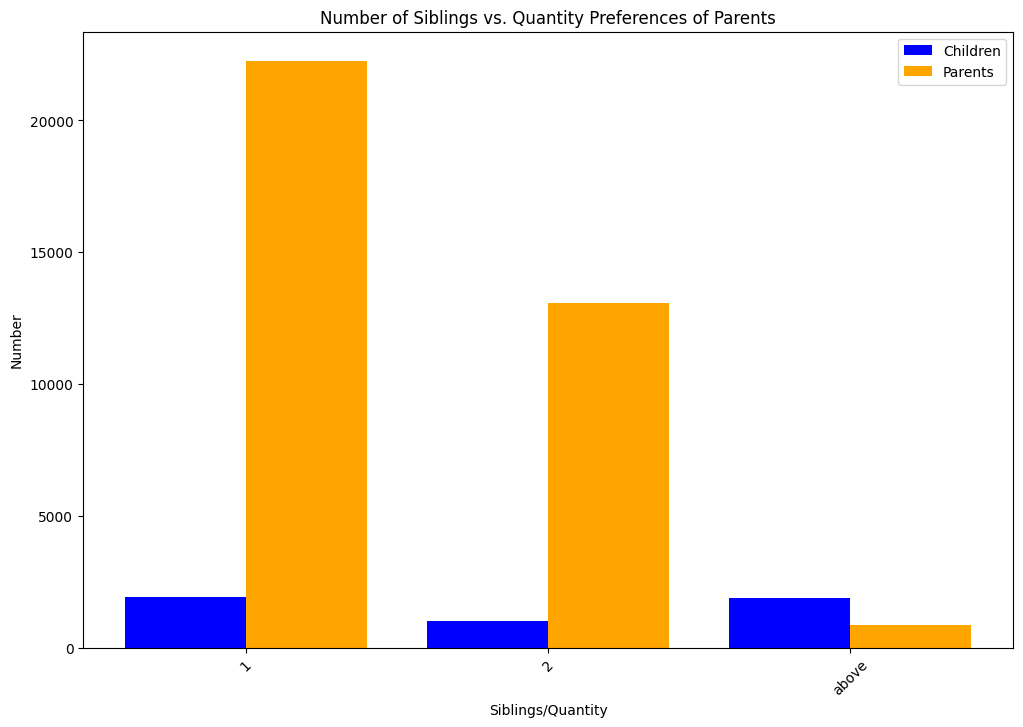

In [654]:
# Reclassify children's siblings data
def reclassify_siblings(siblings):
    if siblings == 'No Siblings':
        return '1'
    elif siblings == 'One Sibling':
        return '2'
    elif siblings == 'Two Siblings':
        return 'above'
    else:
        return 'above'

children_consolidated['siblings_reclassified'] = children_consolidated['siblings'].apply(reclassify_siblings)

# Correctly reclassify parents' accepted quantity preferences
def reclassify_parents_quantity(quantity):
    if quantity == 1:
        return '1'
    elif quantity == 2:
        return '2'
    elif quantity == 'above':
        return 'above'
    else:
        return 'above'

parents_consolidated['accepted_quantity_reclassified'] = parents_consolidated['accepted_quantity'].apply(reclassify_parents_quantity)

# Display the reclassified siblings data
print("Children's reclassified siblings data:")
print(children_consolidated['siblings_reclassified'].value_counts())

# Display the parents' quantity preferences
print("Parents' quantity preferences data:")
print(parents_consolidated['accepted_quantity_reclassified'].value_counts())

# Create data for children
siblings_order = ['1', '2', 'above']
children_siblings_counts = children_consolidated['siblings_reclassified'].value_counts().reindex(siblings_order).fillna(0)

# Create data for parents
parents_quantity_preferences = parents_consolidated['accepted_quantity_reclassified'].value_counts().reindex(siblings_order).fillna(0)

# Combine into a DataFrame for plotting
combined_siblings_data = pd.DataFrame({
    'Siblings/Quantity': siblings_order,
    'Number of Children': children_siblings_counts.values,
    'Number of Parents': parents_quantity_preferences.values
})

# Display the combined data
print("Combined data for plotting:")
print(combined_siblings_data)

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.4
index = range(len(siblings_order))

# Bar chart for children
plt.bar(index, combined_siblings_data['Number of Children'], bar_width, label='Children', color='b')

# Bar chart for parents
plt.bar([i + bar_width for i in index], combined_siblings_data['Number of Parents'], bar_width, label='Parents', color='orange')

plt.xlabel('Siblings/Quantity')
plt.ylabel('Number')
plt.title('Number of Siblings vs. Quantity Preferences of Parents')
plt.xticks([i + bar_width / 2 for i in index], siblings_order, rotation=45)
plt.legend()
plt.show()

***
## Avatars

In [665]:
def get_common_combos(df, n=5, attributes=['age_group', 'gender', 'ethnicity', 'disability', 'siblings', 'disease', 'infectious_disease']):
    combos = df[attributes].apply(tuple, axis=1)
    return Counter(combos).most_common(n)

def create_percentile_profiles(df, attributes=['age_group', 'gender', 'ethnicity', 'disability', 'siblings', 'disease', 'infectious_disease']):
    profiles = {}
    for percentile in [10, 50, 90]:
        profile = {}
        for attr in attributes:
            if df[attr].dtype == 'object':
                profile[attr] = df[attr].value_counts(normalize=True).cumsum().loc[
                    lambda x: x >= percentile/100
                ].index[0]
            else:
                profile[attr] = df[attr].quantile(percentile/100)
        profiles[f"{percentile}th_percentile"] = profile
    return profiles

def calculate_adoption_likelihood(child_profile, parents_df):
    def age_match(parent_age_pref, child_age):
        return child_age in parent_age_pref

    matches = parents_df[
        parents_df['age_preference'].apply(lambda x: age_match(x, child_profile['age_group'])) &
        (parents_df['gender_preference'].apply(lambda x: child_profile['gender'] in x)) &
        (parents_df['ethnicity_preference'].apply(lambda x: child_profile['ethnicity'] in x)) &
        ((parents_df['disability_preference'] == 'No Disability') | (child_profile['disability'] == 'No Disability')) &
        ((parents_df['disease_preference'] == 'No') | (child_profile['disease'] == 'No')) &
        ((parents_df['infectious_disease_preference'] == 'No') | (child_profile['infectious_disease'] == 'No'))
    ]
    return len(matches) / len(parents_df)

def get_avatar_path(profile):
    return f"avatars/{profile['age_group']}_{profile['gender']}_{profile['ethnicity']}.png"

def print_profile(profile, count=None, likelihood=None, regional_likelihoods=None):
    avatar_path = get_avatar_path(profile)
    print(f"[Pixel Art Avatar: {avatar_path}]")
    if count:
        print(f"Count: {count} children with this profile")
    for key, value in profile.items():
        print(f"{key.replace('_', ' ').title()}: {value}")
    if likelihood:
        print(f"Adoption Likelihood: {likelihood:.2%} (National)")
    if regional_likelihoods:
        print("Regional Adoption Likelihood:")
        for region, reg_likelihood in regional_likelihoods.items():
            print(f" - {region}: {reg_likelihood:.2%}")
    print()

# Generate common combos and percentile profiles
national_combos = get_common_combos(children_consolidated)
regional_combos = {region: get_common_combos(children_consolidated[children_consolidated['region'] == region])
                   for region in children_consolidated['region'].unique()}
national_profiles = create_percentile_profiles(children_consolidated)

# Calculate adoption likelihood for each profile
print("========================")
print("5 Most Common Child Profiles Nationally")
print("========================")
for i, (combo, count) in enumerate(national_combos, 1):
    profile = dict(zip(['age_group', 'gender', 'ethnicity', 'disability', 'siblings', 'disease', 'infectious_disease'], combo))
    likelihood = calculate_adoption_likelihood(profile, parents_consolidated)
    regional_likelihoods = {region: calculate_adoption_likelihood(profile, parents_consolidated[parents_consolidated['region'] == region])
                            for region in children_consolidated['region'].unique()}
    print(f"Profile {i}")
    print_profile(profile, count, likelihood, regional_likelihoods)

# Check if national profiles are most common in each region
print("========================")
print("Most Common Child Profile by Region")
print("========================")
for region, combos in regional_combos.items():
    if combos[0] not in national_combos:
        profile = dict(zip(['age_group', 'gender', 'ethnicity', 'disability', 'siblings', 'disease', 'infectious_disease'], combos[0][0]))
        likelihood = calculate_adoption_likelihood(profile, parents_consolidated)
        print(f"Most Common Profile in {region} (different from national)")
        print_profile(profile, combos[0][1], likelihood)

# Generate parent preference profiles
def get_parent_combos(df, n=5):
    def serialize(row):
        return tuple((k, str(v)) for k, v in row.items())
    
    combos = df[['age_preference', 'gender_preference', 'ethnicity_preference', 
                 'disability_preference', 'disease_preference', 'infectious_disease_preference']].apply(serialize, axis=1)
    return Counter(combos).most_common(n)

parent_combos = get_parent_combos(parents_consolidated)

print("========================")
print("5 Most Wanted Parent Preference Profiles")
print("========================")
for i, (combo, count) in enumerate(parent_combos, 1):
    profile = dict(combo)
    profile = {k.replace('preference', '').strip('_'): v for k, v in profile.items()}
    print(f"Profile {i}")
    print_profile(profile, count)

# Comparison Analysis
print("========================")
print("Comparison Analysis")
print("========================")
attributes = ['age_group', 'gender', 'ethnicity', 'disability', 'siblings', 'disease', 'infectious_disease']

for attr in attributes:
    child_dist = children_consolidated[attr].value_counts(normalize=True)
    parent_dist = parents_consolidated[f'{attr}_preference'].apply(pd.Series).stack().value_counts(normalize=True)
    
    plt.figure(figsize=(10, 6))
    child_dist.plot(kind='bar', alpha=0.5, label='Children')
    parent_dist.plot(kind='bar', alpha=0.5, label='Parents')
    plt.title(f'Distribution of {attr.capitalize()}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{attr}_comparison.png')
    plt.close()
    
    print(f"Comparison chart for {attr} saved as {attr}_comparison.png")

print("\nComparison analysis charts have been generated and saved.")

5 Most Common Child Profiles Nationally
Profile 1
[Pixel Art Avatar: avatars/6-8 years_Male_Mixed.png]
Count: 323 children with this profile
Age Group: 6-8 years
Gender: Male
Ethnicity: Mixed
Disability: No Disability
Siblings: No Siblings
Disease: No
Infectious Disease: No
Adoption Likelihood: 0.23% (National)
Regional Adoption Likelihood:
 - Southeast: 0.19%
 - Northeast: 0.60%
 - South: 0.11%
 - North: 0.66%
 - Midwest: 0.00%

Profile 2
[Pixel Art Avatar: avatars/0-2 years_Male_Mixed.png]
Count: 311 children with this profile
Age Group: 0-2 years
Gender: Male
Ethnicity: Mixed
Disability: No Disability
Siblings: No Siblings
Disease: No
Infectious Disease: No
Regional Adoption Likelihood:
 - Southeast: 0.00%
 - Northeast: 0.00%
 - South: 0.00%
 - North: 0.00%
 - Midwest: 0.00%

Profile 3
[Pixel Art Avatar: avatars/4-6 years_Male_Mixed.png]
Count: 302 children with this profile
Age Group: 4-6 years
Gender: Male
Ethnicity: Mixed
Disability: No Disability
Siblings: No Siblings
Disease: N

KeyError: 'age_group'

In [656]:
def get_common_combos(df, n=5, attributes=['age_group', 'ethnicity', 'disability', 'siblings', 'disease']):
    combos = df[attributes].apply(tuple, axis=1)
    return Counter(combos).most_common(n)

def create_percentile_profiles(df, attributes=['age_group', 'ethnicity', 'disability', 'siblings', 'disease']):
    profiles = {}
    for percentile in [10, 50, 90]:
        profile = {}
        for attr in attributes:
            if df[attr].dtype == 'object':
                profile[attr] = df[attr].value_counts(normalize=True).cumsum().loc[
                    lambda x: x >= percentile/100
                ].index[0]
            else:
                profile[attr] = df[attr].quantile(percentile/100)
        profiles[f"{percentile}th_percentile"] = profile
    return profiles

def calculate_adoption_likelihood(child_profile, parents_df):
    matches = parents_df[
        (parents_df['age_preference'].apply(lambda x: child_profile['age_group'] in x)) &
        (parents_df['ethnicity_preference'].apply(lambda x: child_profile['ethnicity'] in x)) &
        (parents_df['disability_preference'] == 'Yes' if child_profile['disability'] != 'No Disability' else True) &
        (parents_df['disease_preference'] == 'Yes' if child_profile['disease'] == 'Yes' else True)
    ]
    return len(matches) / len(parents_df)

# Generate common combos and percentile profiles
national_combos = get_common_combos(children_consolidated)
regional_combos = {region: get_common_combos(children_consolidated[children_consolidated['region'] == region])
                   for region in children_consolidated['region'].unique()}
national_profiles = create_percentile_profiles(children_consolidated)

# Calculate adoption likelihood for each profile
for profile_name, profile in national_profiles.items():
    likelihood = calculate_adoption_likelihood(profile, parents_consolidated)
    print(f"{profile_name} - National adoption likelihood: {likelihood:.2%}")

# Regional analysis
for region in children_consolidated['region'].unique():
    regional_parents = parents_consolidated[parents_consolidated['region'] == region]
    for profile_name, profile in national_profiles.items():
        likelihood = calculate_adoption_likelihood(profile, regional_parents)
        print(f"{profile_name} - {region} adoption likelihood: {likelihood:.2%}")

# Most common combos analysis
print("\nMost common child profiles nationally:")
for combo, count in national_combos:
    print(f"Profile: {combo}, Count: {count}")
    likelihood = calculate_adoption_likelihood(dict(zip(['age_group', 'ethnicity', 'disability', 'siblings', 'disease'], combo)), parents_consolidated)
    print(f"National adoption likelihood: {likelihood:.2%}")


10th_percentile - National adoption likelihood: 0.06%
50th_percentile - National adoption likelihood: 0.25%
90th_percentile - National adoption likelihood: 0.00%
10th_percentile - Southeast adoption likelihood: 0.03%
50th_percentile - Southeast adoption likelihood: 0.26%
90th_percentile - Southeast adoption likelihood: 0.00%
10th_percentile - Northeast adoption likelihood: 0.05%
50th_percentile - Northeast adoption likelihood: 0.33%
90th_percentile - Northeast adoption likelihood: 0.00%
10th_percentile - South adoption likelihood: 0.09%
50th_percentile - South adoption likelihood: 0.16%
90th_percentile - South adoption likelihood: 0.00%
10th_percentile - North adoption likelihood: 0.00%
50th_percentile - North adoption likelihood: 0.42%
90th_percentile - North adoption likelihood: 0.00%
10th_percentile - Midwest adoption likelihood: 0.12%
50th_percentile - Midwest adoption likelihood: 0.33%
90th_percentile - Midwest adoption likelihood: 0.00%

Most common child profiles nationally:
Pro

## References
- Nascimento, P. F. V. (2020). Do processo à discriminação sociorracial: uma análise das dificuldades atinentes ao sistema de adoção no Brasil. Centro Universitário Fametro, Fortaleza.
- De Mello Casado, V. R., & De Medeiros Agra, L. (2021). OS IMPASSES DA ADOÇÃO NO BRASIL: A UTOPIA DO PERFECCIONISMO E A BUSCA POR CRIANÇAS QUE NÃO EXISTEM. SEMPESq - Semana De Pesquisa Da Unit - Alagoas. Retrieved from https://eventos.set.edu.br/al_sempesq/article/view/15115
- Menezes, L. G. (2020). ADOÇÃO NO BRASIL: A EFETIVIDADE DO PROCEDIMENTO NA INCLUSÃO DE "PERFIS INDESEJADOS" PELOS PRETENDENTES. Universidade Federal do Rio Grande do Sul, Porto Alegre.
- Stareika, G. A. (2021). Adoção tardia: uma análise sobre o perfil da adoção no Brasil.
- Guida-Richards, M. (2021). What White Parents Should Know about Transracial Adoption: An Adoptee's Perspective on Its History, Nuances, and Practices.


- FALTA BOTAR O CNA

In [ ]:
Visualizations and Analysis

Demographic Characteristics of Children Awaiting Adoption

Histogram: Age distribution of children.
Bar Chart: Distribution of gender, ethnicity, disability, and infectious diseases.
Geographical Distribution: Map showing the number of children in different regions.
Preferences of Prospective Adoptive Parents

Bar Chart: Preferences for gender, ethnicity, disability, and infectious diseases.
Pie Chart: Age preferences of parents.
Stacked Bar Chart: Comparing the preferences by region.
Match Rate Analysis

Heatmap: Showing the match rate of children's characteristics and parents' preferences across regions.
Scatter Plot: Relationship between the number of children available and the number of parents' preferences.
Profile Analysis: Create 3-5 profiles based on common characteristics and calculate the match ratio for these profiles.